CARLA DE LA ROSA Y PEDRO BÉJAR.

Esta práctica está realizada por Carla de la Rosa y Pedro Béjar y hemos elegido para la práctica final de modelos no supervisados el problema de regresión de los datos de AirBnB, que el objetivo principal es hacer un evaluador de precios.

En los últimos años, el mercado de alojamientos compartidos ha experimentado un crecimiento exponencial, con plataformas como Airbnb liderando la revolución en la forma en que las personas reservan alojamientos durante sus viajes. Con millones de listados disponibles en todo el mundo, tanto para viajeros como para anfitriones, surge la necesidad de establecer precios justos y competitivos para los alojamientos ofrecidos.

El objetivo de este trabajo es desarrollar un evaluador automático de precios basado en las características de los alojamientos de Airbnb. Utilizando técnicas de modelos no supervisados en el lenguaje Python, se busca aprovechar las ventajas del aprendizaje automático y la generación de nuevas características a partir de los datos existentes, para proporcionar una estimación precisa y confiable del precio de un alojamiento.

En este trabajo, comenzará con un análisis descriptivo y se explorarán técnicas de codificación de variables no supervisadas, para enriquecer el conjunto de datos y mejorar la calidad de las características disponibles. Además, se realizará un análisis exploratorio exhaustivo para comprender las relaciones entre las diferentes características y el precio de los alojamientos.

Posteriormente, se procederá a seleccionar y evaluar distintos modelos de aprendizaje automático, considerando algoritmos como la regresión lineal, KNN, modelos de árbol de decisiones, Random Forest, Bagging y Gradient Boost. Se compararán y analizarán los resultados obtenidos por cada modelo, evaluando su rendimiento y precisión en la predicción de precios.

En resumen, este trabajo propone un enfoque integral y riguroso para la creación de un evaluador automático de precios para alojamientos de Airbnb. A través del análisis de datos, la generación de características, la selección y evaluación de modelos, y la búsqueda de explicabilidad, se espera obtener una herramienta útil y confiable para anfitriones y viajeros en la determinación de precios justos y competitivos en el mercado de alojamientos compartidos.


# **CARGA DE DATOS**

In [1]:
from google.colab import drive
drive.mount('airbnb-listings-extract.csv')
drive.mount('airbnb-listings-cleaned.csv')

Mounted at airbnb-listings-extract.csv
Mounted at airbnb-listings-cleaned.csv


In [2]:
from google.colab import drive
drive.mount('/content/drive')

# Busque el archivo CSV
!find /content/drive/ - airbnb-listings-extract.csv


Mounted at /content/drive
/content/drive/
/content/drive/MyDrive
/content/drive/MyDrive/modelos_no
/content/drive/MyDrive/modelos_no/MODELOS NO SUPERVISADOS.docx
/content/drive/MyDrive/modelos_no/PYTHON 4º.docx
/content/drive/MyDrive/modelos_no/realstate.ipynb
/content/drive/MyDrive/modelos_no/Untitled.ipynb
/content/drive/MyDrive/modelos_no/automobile.arff
/content/drive/MyDrive/modelos_no/automobile.csv
/content/drive/MyDrive/modelos_no/Pandas_IntroductionV1.ipynb
/content/drive/MyDrive/modelos_no/Exploratory_data_analysisV1.ipynb
/content/drive/MyDrive/modelos_no/01_Exploracion_general.html
/content/drive/MyDrive/modelos_no/Untitled1.ipynb
/content/drive/MyDrive/modelos_no/01_Exploracion_general.pdf
/content/drive/MyDrive/modelos_no/Ejercicios PCA-Copy1.ipynb
/content/drive/MyDrive/modelos_no/CÓDIGO.docx
/content/drive/MyDrive/modelos_no/Ejercicios PCA.ipynb
/content/drive/MyDrive/modelos_no/nn.pdf
/content/drive/MyDrive/modelos_no/Untitled2.ipynb
/content/drive/MyDrive/modelos_no/

In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Busque el archivo CSV
!find /content/drive/ - airbnb-listings-cleaned.csv

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/
/content/drive/MyDrive
/content/drive/MyDrive/modelos_no
/content/drive/MyDrive/modelos_no/MODELOS NO SUPERVISADOS.docx
/content/drive/MyDrive/modelos_no/PYTHON 4º.docx
/content/drive/MyDrive/modelos_no/realstate.ipynb
/content/drive/MyDrive/modelos_no/Untitled.ipynb
/content/drive/MyDrive/modelos_no/automobile.arff
/content/drive/MyDrive/modelos_no/automobile.csv
/content/drive/MyDrive/modelos_no/Pandas_IntroductionV1.ipynb
/content/drive/MyDrive/modelos_no/Exploratory_data_analysisV1.ipynb
/content/drive/MyDrive/modelos_no/01_Exploracion_general.html
/content/drive/MyDrive/modelos_no/Untitled1.ipynb
/content/drive/MyDrive/modelos_no/01_Exploracion_general.pdf
/content/drive/MyDrive/modelos_no/Ejercicios PCA-Copy1.ipynb
/content/drive/MyDrive/modelos_no/CÓDIGO.docx
/content/drive/MyDrive/modelos_no/Ejercicios PCA.ipynb
/content/drive/MyDrive

Cargamos las librerías necesarias a continuación:

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.impute import KNNImputer
import scipy.stats as ss
from sklearn.metrics import average_precision_score, precision_recall_curve,recall_score,precision_score,confusion_matrix
import warnings

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 5000)

In [5]:
ruta = '/content/drive/MyDrive/airbnb-listings-extract.csv'
df = pd.read_csv(ruta, sep= ';')

In [6]:
ruta1 = '/content/drive/MyDrive/airbnb-listings-cleaned.csv'
data_cleaned = pd.read_csv(ruta1, sep = ',')

# **ANALISIS DESCRIPTIVO**

Para realizar un análisis descriptivo sobre las variables de los datos de AirBnb es necesario examinarlas a cada una de manera separada. A continuación de proporcionará una breve descripción sobre cada una de ellas:
1. id: El identificador único para cada lista de Airbnb.
2. experiences_offered: El tipo de experiencias ofrecidas por el anfitrión.
3. host_id: El identificador único del anfitrión.
4. host_name: El nombre del anfitrión.
5. host_since: La fecha en que el anfitrión se unió a Airbnb.
6. host_location: La ubicación del anfitrión.
7. host_response_time: El tiempo de respuesta del anfitrión.
8. host_response_rate: La tasa de respuesta del anfitrión.
9. host_acceptance_rate: La tasa de aceptación del anfitrión.
10. host_is_superhost: Indica si el anfitrión es un "Superhost" o no.
11. host_neighbourhood: El barrio donde se encuentra el anfitrión.
12. host_listings_count: El número de listados del anfitrión.
13. host_total_listings_count: El número total de listados del anfitrión.
14. host_has_profile_pic: Indica si el anfitrión tiene una foto de perfil.
15. host_identity_verified: Indica si la identidad del anfitrión ha sido verificada.
16. street: La dirección de la propiedad.
17. neighbourhood: El vecindario donde se encuentra la propiedad.
18. neighbourhood_cleansed: El vecindario de la propiedad después de ser procesado.
19. neighbourhood_group_cleansed: El grupo de vecindarios de la propiedad después de ser procesado.
20. city: La ciudad donde se encuentra la propiedad.
21. state: El estado donde se encuentra la propiedad.
22. zipcode: El código postal donde se encuentra la propiedad.
23. market: El mercado al que pertenece la propiedad.
24. smart_location: La ubicación inteligente de la propiedad.
25. country_code: El código del país donde se encuentra la propiedad.
26. country: El país donde se encuentra la propiedad.
27. latitude: La latitud de la propiedad.
28. longitude: La longitud de la propiedad.
29. is_location_exact: Indica si la ubicación es exacta o aproximada.
30. property_type: El tipo de propiedad (apartamento, casa, habitación, etc.).
31. room_type: El tipo de habitación (completa, compartida, privada, etc.).
32. accommodates: El número de personas que pueden ser alojadas.
33. bathrooms: El número de baños en la propiedad.
34. bedrooms: El número de dormitorios en la propiedad.
35. beds: El número de camas en la propiedad.
36. bed_type: El tipo de cama (normal, sofá cama, cama de aire, etc.).
37. square_feet: Los pies cuadrados de la propiedad.
38. price: El precio por noche para alquilar la propiedad.
39. weekly_price: El precio semanal para alquilar la propiedad.
40. monthly_price: El precio mensual para alquilar la propiedad.
41. security_deposit: El depósito de seguridad requerido para alquilar la propiedad.
42. cleaning_fee: La tarifa de limpieza requerida para alquilar la propiedad.
44. guests_included: El número de huéspedes incluidos en el precio base.
45. extra_people: El costo adicional por persona adicional.
46. minimum_nights: El número mínimo de noches requeridas para reservar la propiedad.
47. maximum_nights: El número máximo de noches permitidas para reservar la propiedad.
48. minimum_minimum_nights: El mínimo de noches requeridas para reservar en el período más corto.
49. maximum_minimum_nights: El máximo de noches requeridas para reservar en el período más corto.
50. minimum_maximum_nights: El mínimo de noches requeridas para reservar en el período más largo.
51. maximum_maximum_nights: El máximo de noches requeridas para reservar en el período más largo.
52. minimum_nights_avg_ntm: El promedio mínimo de noches requeridas para reservar.
53. maximum_nights_avg_ntm: El promedio máximo de noches requeridas para reservar.
54. calendar_updated: La última vez que se actualizó el calendario de disponibilidad.
55. has_availability: Indica si la propiedad tiene disponibilidad en el calendario.
56. availability_30: El número de días disponibles en los próximos 30 días.
57. availability_60: El número de días disponibles en los próximos 60 días.
58. availability_90: El número de días disponibles en los próximos 90 días.
59. availability_365: El número de días disponibles en el próximo año.
60. calendar_last_scraped: La fecha en que se obtuvo por última vez la información del calendario.
61. number_of_reviews: El número total de reseñas de la propiedad.
62. number_of_reviews_ltm: El número de reseñas recibidas en el último año.
63. first_review: La fecha de la primera reseña de la propiedad.
64. last_review: La fecha de la última reseña de la propiedad.
65. review_scores_rating: La puntuación promedio de las reseñas recibidas.
66. review_scores_accuracy: La puntuación promedio de precisión de las reseñas recibidas.
67. review_scores_cleanliness: La puntuación promedio de limpieza de las reseñas recibidas.
68. review_scores_checkin: La puntuación promedio de check-in de las reseñas recibidas.
69. review_scores_communication: La puntuación promedio de comunicación de las reseñas recibidas.
70. review_scores_location: La puntuación promedio de ubicación de las reseñas recibidas.
71. review_scores_value: La puntuación promedio de valor de las reseñas recibidas.
72. requires_license: Indica si se requiere una licencia para reservar la propiedad.
73. license: El número de licencia requerido para reservar la propiedad.
74. instant_bookable: Indica si la propiedad se puede reservar instantáneamente.
75. is_business_travel_ready: Indica si la propiedad está lista para viajes de negocios.
76. cancellation_policy: La política de cancelación de la propiedad.
77. require_guest_profile_picture: Indica si se requiere una foto de perfil de los huéspedes.
78. require_guest_phone_verification: Indica si se requiere la verificación del teléfono de los huéspedes.
79. calculated_host_listings_count: El número total de listados del anfitrión.
80. calculated_host_listings_count_entire_homes: El número de listados de la propiedad completa del anfitrión.
81. calculated_host_listings_count_private_rooms: El número de listados de habitaciones privadas del anfitrión.
82. calculated_host_listings_count_shared_rooms: El número de listados de habitaciones compartidas del anfitrión.
83. reviews_per_month: El promedio de reseñas recibidas por mes.


# **ANÁLISIS** **EXPLORATORIO**

Comenzamos obteniendo las dos primeras filas ("df.head") y la dimensaion de filas y columnas ("df.shape") de nuestro DataFrame.

In [7]:
df.head(2)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host ID,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Response Rate,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Listings Count,Host Total Listings Count,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Latitude,Longitude,Property Type,Room Type,Accommodates,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Calendar Updated,Has Availability,Availability 30,Availability 60,Availability 90,Availability 365,Calendar last Scraped,Number of Reviews,First Review,Last Review,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,58386783,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,1.0,1.0,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,30.337361,-97.863277,Loft,Entire home/apt,2,1.0,1.0,1.0,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",NaN,58.0,NaN,NaN,100.0,NaN,1,0,2,1125,today,NaN,10,34,64,281,2017-03-06,42,2016-03-13,2017-02-26,98.0,10.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,102947901,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,100.0,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,162.0,162.0,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain

In [8]:
df.shape

(14780, 89)

 Comparamos la dimensión de nuestro dataset normal y al que hemos extraido los valores duplicados.

In [9]:

print(df.shape, df.drop_duplicates().shape)

(14780, 89) (14780, 89)


Puesto que el dataset reduce el número de filas una vez que se quitan los valores duplicados, a continuación, voy a renombrar el data quitando los valores duplicados.

In [10]:
df = df.drop_duplicates()

In [11]:
#Aquí voy a ver los tipos de datos de cada columna
df.dtypes.to_dict()

{'ID': dtype('int64'),
 'Listing Url': dtype('O'),
 'Scrape ID': dtype('int64'),
 'Last Scraped': dtype('O'),
 'Name': dtype('O'),
 'Summary': dtype('O'),
 'Space': dtype('O'),
 'Description': dtype('O'),
 'Experiences Offered': dtype('O'),
 'Neighborhood Overview': dtype('O'),
 'Notes': dtype('O'),
 'Transit': dtype('O'),
 'Access': dtype('O'),
 'Interaction': dtype('O'),
 'House Rules': dtype('O'),
 'Thumbnail Url': dtype('O'),
 'Medium Url': dtype('O'),
 'Picture Url': dtype('O'),
 'XL Picture Url': dtype('O'),
 'Host ID': dtype('int64'),
 'Host URL': dtype('O'),
 'Host Name': dtype('O'),
 'Host Since': dtype('O'),
 'Host Location': dtype('O'),
 'Host About': dtype('O'),
 'Host Response Time': dtype('O'),
 'Host Response Rate': dtype('float64'),
 'Host Acceptance Rate': dtype('O'),
 'Host Thumbnail Url': dtype('O'),
 'Host Picture Url': dtype('O'),
 'Host Neighbourhood': dtype('O'),
 'Host Listings Count': dtype('float64'),
 'Host Total Listings Count': dtype('float64'),
 'Host Veri

Se puede observar que todas las variables son de tipo object salvo dos que son de tipo int c_year (años) y c_sev (gravedad de la colisión)

In [12]:
df.isnull().sum()

ID                                    0
Listing Url                           0
Scrape ID                             0
Last Scraped                          0
Name                                  1
Summary                             591
Space                              3892
Description                           6
Experiences Offered                   0
Neighborhood Overview              5646
Notes                              9136
Transit                            5714
Access                             6462
Interaction                        6552
House Rules                        5161
Thumbnail Url                      2820
Medium Url                         2820
Picture Url                          19
XL Picture Url                     2820
Host ID                               0
Host URL                              0
Host Name                             3
Host Since                            3
Host Location                        43
Host About                         5241


In [13]:
df.describe()

,ID,Scrape ID,Host ID,Host Response Rate,Host Listings Count,Host Total Listings Count,Latitude,Longitude,Accommodates,Bathrooms,Bedrooms,Beds,Square Feet,Price,Weekly Price,Monthly Price,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 30,Availability 60,Availability 90,Availability 365,Number of Reviews,Review Scores Rating,Review Scores Accuracy,Review Scores Cleanliness,Review Scores Checkin,Review Scores Communication,Review Scores Location,Review Scores Value,Calculated host listings count,Reviews per Month
count,1.478000e+04,1.478000e+04,1.478000e+04,12881.000000,14777.000000,14777.000000,14780.000000,14780.000000,14780.000000,14725.000000,14755.000000,14731.00000,598.000000,14763.000000,3590.000000,3561.000000,6256.000000,8687.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,14780.000000,11476.000000,11454.000000,11460.000000,11443.000000,11460.000000,11440.000000,11439.000000,14776.000000,11618.000000
mean,1.028089e+07,2.017037e+13,3.608080e+07,94.823461,12.513636,12.513636,40.497626,-3.858041,3.277808,1.281732,1.343816,2.04426,390.456522,73.561471,376.937883,1426.125246,189.226822,31.805341,1.589986,7.690460,3.050474,945.168742,8.954736,22.996211,39.869621,202.104465,22.632273,91.697978,9.416012,9.328883,9.621778,9.647033,9.532168,9.218201,9.486871,1.870014
std,5.564829e+06,5.667971e+08,3.425360e+07,15.215988,34.090223,34.090223,4.641387,14.123146,2.097291,0.658517,0.900078,1.61277,637.134930,72.062050,195.701043,1246.403853,115.151070,30.878599,1.182550,12.971352,12.266517,8439.321218,9.333252,19.731371,29.621456,127.886822,38.290244,8.989101,0.921938,0.989933,0.802736,0.767116,0.774527,0.950578,23.626014,1.867550
min,1.862800e+04,2.016010e+13,1.745300e+04,0.000000,0.000000,0.000000,-37.851182,-123.131344,1.000000,0.000000,0.000000,1.00000,0.000000,9.000000,70.000000,250.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,0.020000
25%,5.554732e+06,2.017041e+13,6.787360e+06,100.000000,1.000000,1.000000,40.409726,-3.707604,2.000000,1.000000,1.000000,1.00000,0.000000,34.000000,215.000000,720.000000,100.000000,15.000000,1.000000,0.000000,1.000000,365.000000,0.000000,4.000000,12.000000,78.000000,1.000000,89.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,0.450000
50%,1.133492e+07,2.017041e+13,2.464875e+07,100.000000,2.000000,2.000000,40.419466,-3.700785,3.000000,1.000000,1.000000,2.00000,98.500000,55.000000,350.000000,1200.000000,150.000000,25.000000,1.000000,0.000000,2.000000,1125.000000,6.000000,20.000000,38.000000,239.000000,7.000000,94.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.000000,2.000000,1.200000
75%,1.532631e+07,2.017041e+13,5.432919e+07,100.000000,6.000000,6.000000,40.430916,-3.684057,4.000000,1.000000,2.000000,2.00000,646.000000,86.000000,500.000000,1725.000000,200.000000,40.000000,2.000000,15.000000,3.000000,1125.000000,14.000000,38.000000,65.000000,319.000000,27.000000,98.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.780000
max,1.910969e+07,2.017062e+13,1.247534e+08,100.000000,519.000000,519.000000,55.966912,153.371427,16.000000,8.000000,10.000000,16.00000,6997.000000,999.000000,999.000000,25000.000000,990.000000,662.000000,16.000000,500.000000,1125.000000,1000000.000000,30.000000,60.000000,90.000000,365.000000,446.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,145.000000,17.210000


In [14]:
#Para ver la correlación escogeré únicamente las variables continuas
continuas = df.select_dtypes(include=['float', 'int'])
continuas.shape[1]

36

<ipython-input-15-41c580522d3e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  continuas_corr = df.corr(method='pearson')


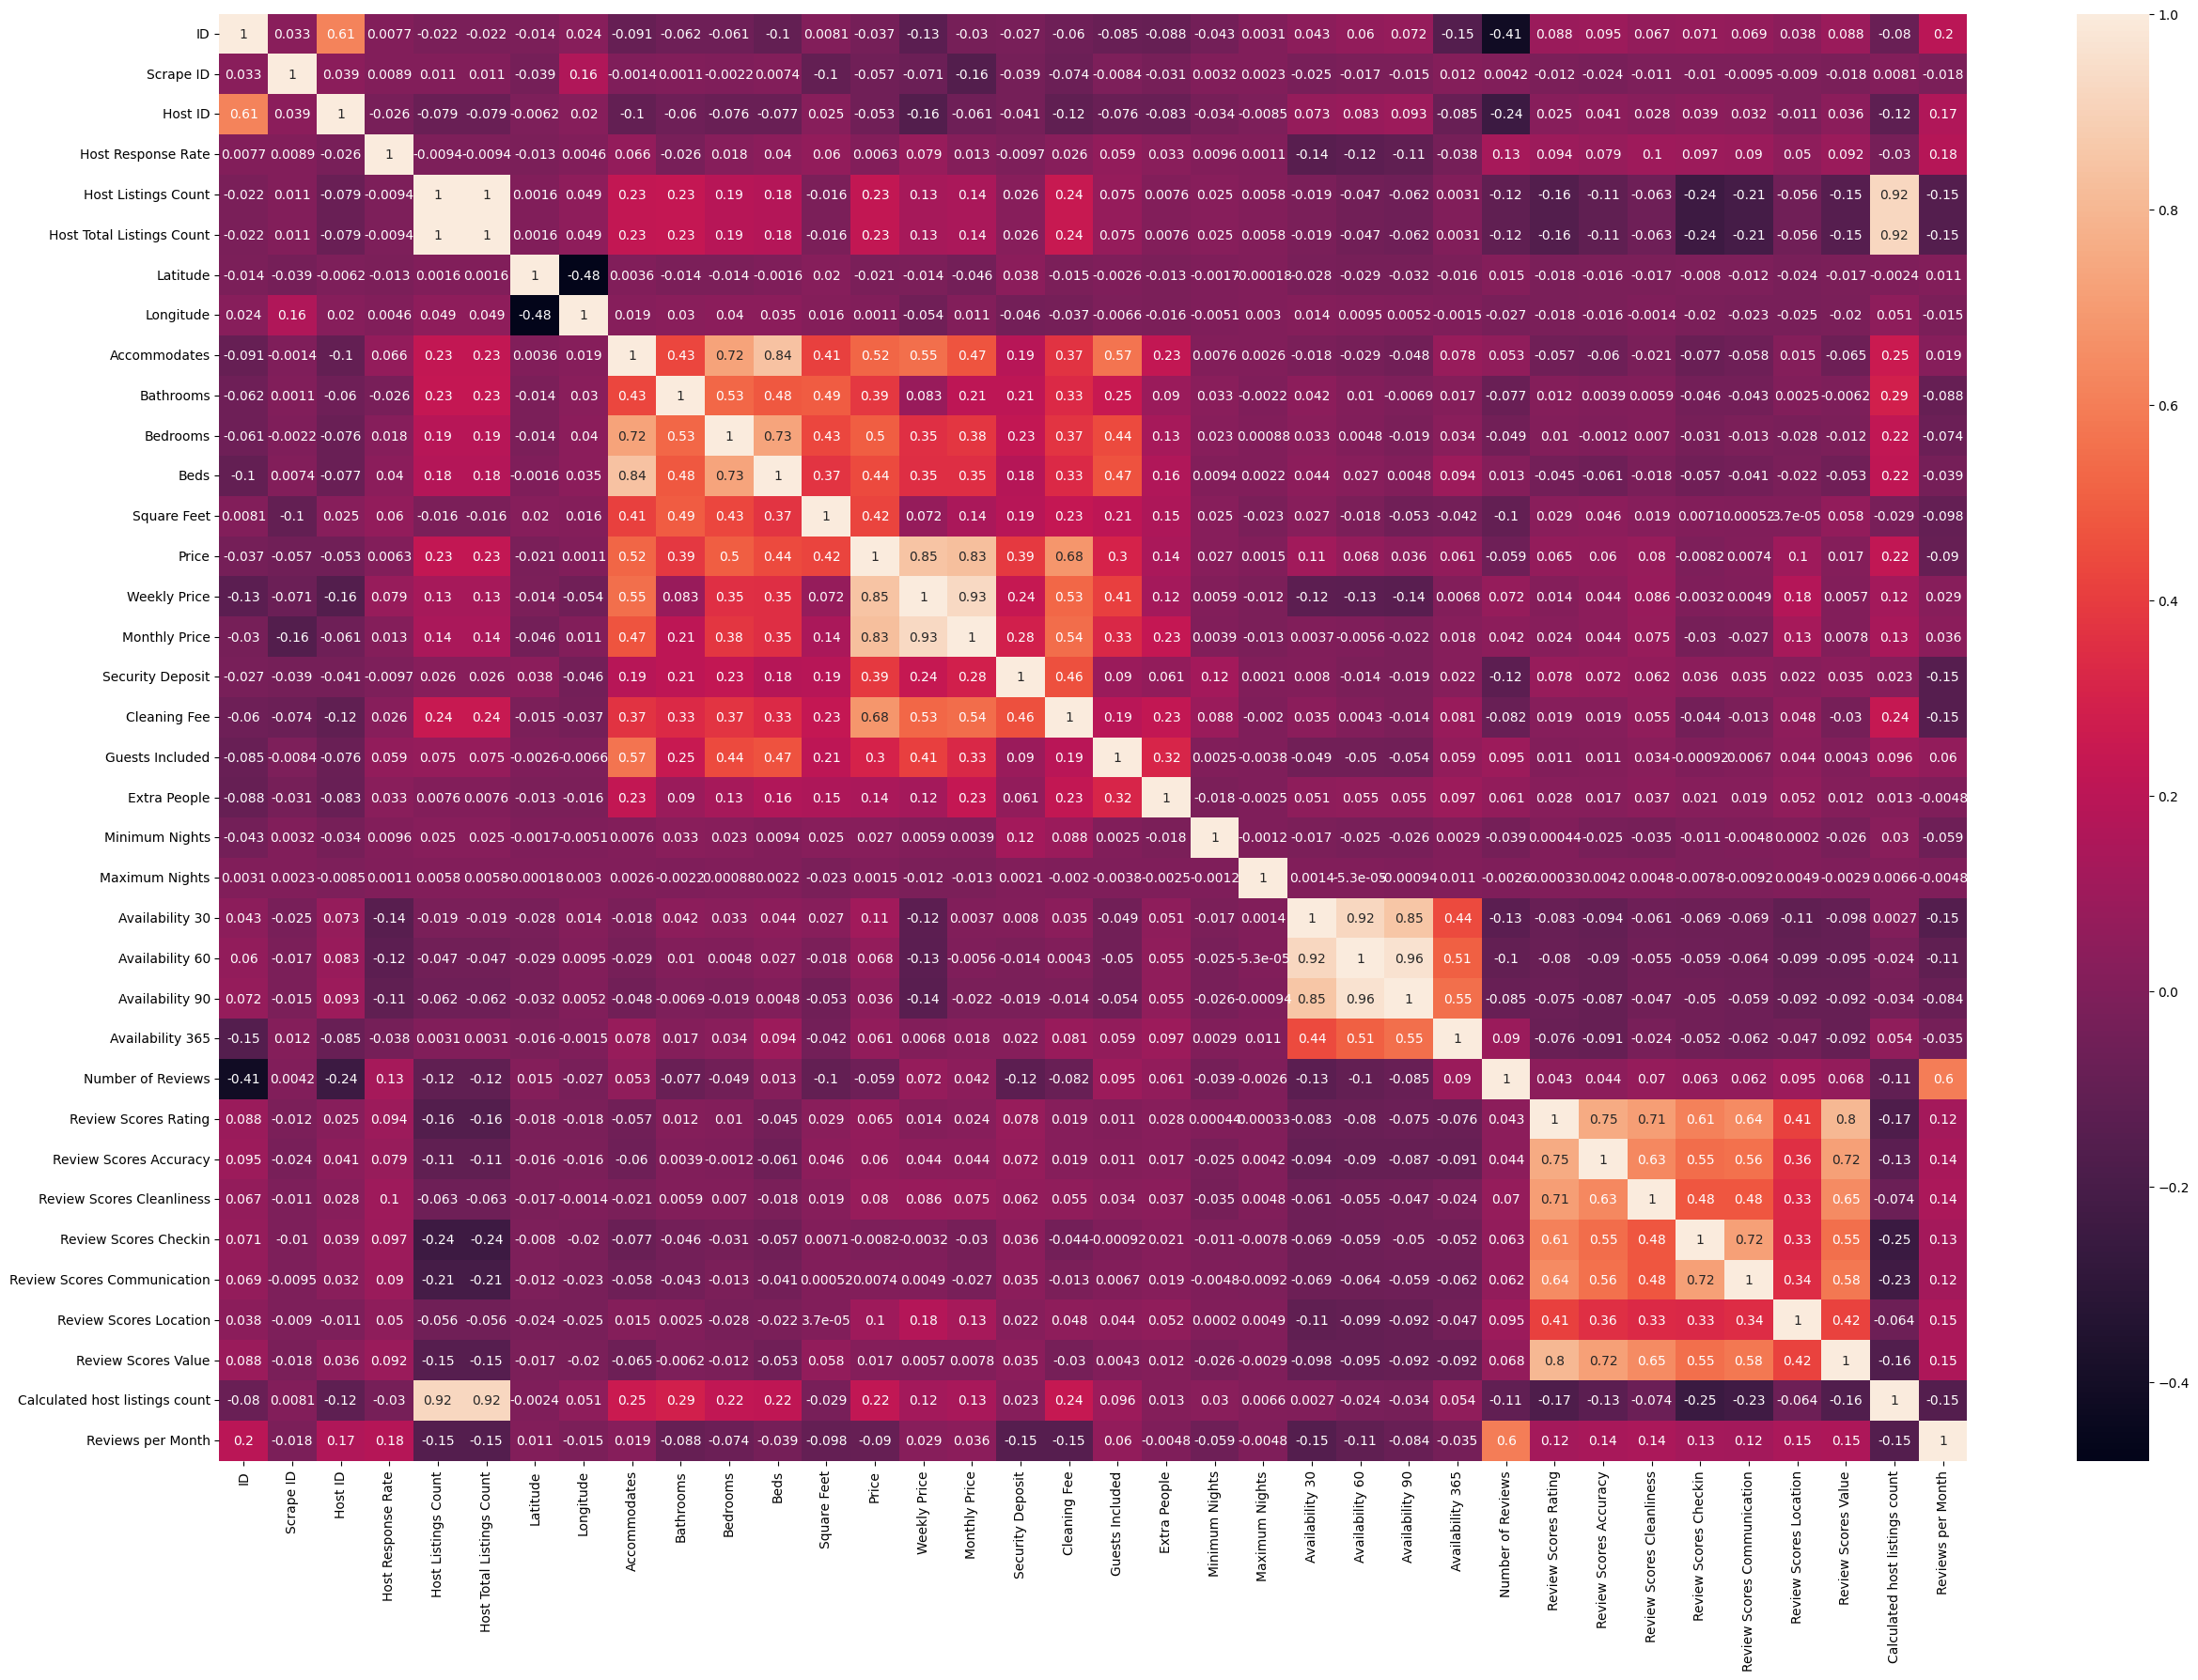

In [15]:
continuas_corr = df.corr(method='pearson')

plt.figure(figsize = (30,20))
sns.heatmap(continuas_corr, annot=True)
plt.show()

En este gráfico de correlaciones, se puede observar que no hay multicolinealidad. Salvo en algunas variables que a continuación en el tratamiento de datos eliminaremos aquellas que tienen alta correlación para que no haya multicolinealidad como es en el caso, de los diferentes tipos de Reviews, de los diferentes tipos de Price, de los HostListings Count, de los diferentes Availabilities...

A continuación vamos a analizar las variables categóricas:

In [16]:
categoricas = df.select_dtypes('object')
categoricas.shape[1]

53

In [17]:
categoricas.head(2)

,Listing Url,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,Notes,Transit,Access,Interaction,House Rules,Thumbnail Url,Medium Url,Picture Url,XL Picture Url,Host URL,Host Name,Host Since,Host Location,Host About,Host Response Time,Host Acceptance Rate,Host Thumbnail Url,Host Picture Url,Host Neighbourhood,Host Verifications,Street,Neighbourhood,Neighbourhood Cleansed,Neighbourhood Group Cleansed,City,State,Zipcode,Market,Smart Location,Country Code,Country,Property Type,Room Type,Bed Type,Amenities,Calendar Updated,Has Availability,Calendar last Scraped,First Review,Last Review,License,Jurisdiction Names,Cancellation Policy,Geolocation,Features
0,https://www.airbnb.com/rooms/11210388,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,The loft is located on a gated property. Ther...,There is no public transportation from this lo...,The loft is entirely private to the guest as i...,My wife and I live on the property so we would...,The loft is entirely private but is adjacent t...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/c351a9b5-5...,https://www.airbnb.com/users/show/58386783,John,2016-02-11,My father was USAF so I was born at Offutt AFB...,I am a High Tech Professional with over 30 yea...,within an hour,NaN,https://a0.muscache.com/im/pictures/c5c78f08-f...,https://a0.muscache.com/im/pictures/c5c78f08-f...,NaN,"email,phone,reviews,kba","Canyon Edge Drive, Austin, TX 78733, United St...",NaN,78733,NaN,Austin,TX,78733,Austin,"Austin, TX",US,United States,Loft,Entire home/apt,Real Bed,"TV,Cable TV,Internet,Wireless Internet,Air con...",today,NaN,2017-03-06,2016-03-13,2017-02-26,NaN,NaN,moderate,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,https://www.airbnb.com/rooms/17471131,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,NaN,Ideal to discover the city either on foot or b...,Travellers will have access to the entire apar...,We will be more than happy to help you with an...,CHECK-IN Week Days: The check-in and key colle...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://public.opendatasoft.com/api/v2/catalog...,https://a0.muscache.com/im/pictures/3ce27aee-f...,https://www.airbnb.com/users/show/102947901,Claudia,2016-11-08,"Barcelona, Catalonia, Spain",Hola a todos! Soy Claudia Castillo y soy parte...,within an hour,NaN,https://a0.muscache.com/im/pictures/c071e13e-5...,https://a0.muscache.com/im/pictures/c071e13e-5...,NaN,"email,phone,reviews,work_email","Barcelona, Barcelona 08010, Spain",NaN,la Dreta de l'Eixample,Eixample,Barcelona,Barcelona,08010,Barcelona,"Barcelona, Spain",ES,Spain,Apartment,Entire home/apt,Real Bed,"Wireless Internet,Air conditioning,Elevator in...",today,NaN,2017-04-08,2017-03-05,2017-03-05,HUTB-006721,NaN,super_strict_30,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."


Viendo las diferentes variables categóricas, se puede observar que hay muchas variables que no son necesarias, como los urls, las notas, la descripción...

Hemos intentado hacer la separación de train y test antes del tratamiento de datos, pero después del tratamiento al volverlo a separar en train y test no volvía a ser el mismo, hemos intentado combinando los dos dataset de train y test pero no ha sido posible, por eso la razón de que llame al df, df_comb porque el tratamiento de datos lo hacía del concat de train y test.

In [18]:
df_comb = df

# **TRATAMIENTO** **DE** **DATOS**

Vamos a analizar el número de valores NaNs por filas para eliminar aquellas filas que tengan más de un porcntaje, debido a que no aportan información suficiente.

In [19]:
pd_series_null_rows = df_comb.isnull().sum(axis=1).sort_values(ascending=False)
pd_null_filas = pd.DataFrame(pd_series_null_rows, columns=['nulos_filas']) 
pd_null_filas['porcentaje_filas']= pd_null_filas['nulos_filas']/df_comb.shape[1]
pd_null_filas.head()

,nulos_filas,porcentaje_filas
14255,38,0.426966
94,36,0.404494
150,35,0.393258
7438,35,0.393258
1898,35,0.393258


In [20]:
#Vamos a eliminar aquellas filas que tengan más del 95% de valores nulos
# Seleccionamos las filas que tienen más del 95% de valores nulos
filas_a_eliminar = pd_null_filas['porcentaje_filas'][pd_null_filas['porcentaje_filas'] > 0.95].index

# Eliminamos las filas seleccionadas
df_comb = df_comb.drop(index=filas_a_eliminar)

In [21]:
#Esta función se va a emplear en las variables categóricas para reemplazar los valores nulos, 
#con las medias suavizadas de la variable Price agrupada por cada variable categórica.
def calc_smooth_mean(df_comb, by, on, m):
    # Compute the global mean
    mean = df_comb[on].mean()

    # Compute the number of values and the mean of each group
    agg = df_comb.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / (counts + m)

    # Replace each value by the according smoothed mean
    return df_comb[by].map(smooth)

In [22]:
df_comb['Host Since'] = df_comb['Host Since'].astype(str)

In [23]:
from datetime import datetime

In [24]:
#En este código eliminamos las columnas que no son útiles como los url, el id, 
#el evaluador será únicamente comparado con el precio normal, las cosas escritas como notes, descriptions...
not_useful_columns = [
    'ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Thumbnail Url', 'Medium Url', 
    'Picture Url', 'XL Picture Url', 'Host ID', 'Host URL', 'Host Name', 
    'Host Thumbnail Url', 'Host Picture Url', 'Host Neighbourhood', 'Weekly Price', 
    'Monthly Price', 'Calendar Updated', 'Calendar last Scraped', 'First Review', 
    'Last Review', 'Reviews per Month', 'Geolocation', 'Calculated host listings count',
    'Host Listings Count', 'Host Total Listings Count'
]
somehow_useful_columns_but_droppable_anyway = ['Name', 'Summary', 'Space', 'Description',
       'Neighborhood Overview', 'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Host Location', 'Host About'
]
columns_with_too_many_missing_values = [
    'Host Acceptance Rate', 'Square Feet', 'Has Availability', 'License', 'Jurisdiction Names'
]

df_comb.drop(not_useful_columns, axis=1, inplace=True)
df_comb.drop(somehow_useful_columns_but_droppable_anyway, axis=1, inplace=True)
df_comb.drop(['Street', 'State', 'Market', 'Smart Location', 'Country', 'Zipcode'], axis=1, inplace=True)  #se eliminan todos estos valores porque en realidad solo hay datos de madrid
df_comb.drop(columns_with_too_many_missing_values, axis=1, inplace=True)

reviews = df_comb.loc[: , "Review Scores Rating":"Review Scores Value"]
df_comb['Average Review'] = reviews.mean(axis=1)

df_comb.drop(['Availability 30', 'Availability 60', 'Availability 90', 'Review Scores Rating', 
         'Review Scores Accuracy', 'Review Scores Cleanliness', 'Review Scores Checkin',
       'Review Scores Communication', 'Review Scores Location', 'Review Scores Value',
        'Accommodates'], axis=1, inplace=True)   #Como hemos mencionado anteriormente quitamos aquellas variables que tenian colinealidad en el gráfico de correlación.

df_comb = df_comb[df_comb['Price'] < 200]  #Quitamos outliers extrayendo los alojamientos ocn precio >200
df_comb["Final Neighbourhood"] = df["Neighbourhood Group Cleansed"].fillna(df_comb["Neighbourhood Cleansed"])
df_comb.drop(["Neighbourhood", "Neighbourhood Group Cleansed", "Neighbourhood Cleansed"], axis=1, inplace=True)

df_comb['Features'].fillna("", inplace=True) # rellenamos los huecos con cadenas vacías
df_comb['Amenities'].fillna("", inplace=True)
df_comb['Host Verifications'].fillna("", inplace=True)

df_comb['Features'] = df_comb['Features'].apply(lambda x: len(str(x).split(',')))
df_comb['Amenities'] = df_comb['Amenities'].apply(lambda x: len(str(x).split(',')))
df_comb['Host Verifications'] = df_comb['Host Verifications'].apply(lambda x: len(str(x).split(',')))



print(df_comb.shape)

(14105, 29)


In [25]:
df_comb['Host Since'].dropna(inplace=True)

def convert_date(x):
    try:
        return datetime.strptime(str(x), '%Y-%m-%d')   #Transformamos la variable HostSince que es de tipo datetime a str para poder trabajar con la variable
    except ValueError:
        return None

df_comb['Host Since'] = df_comb['Host Since'].apply(convert_date)
df_comb['Years Being Host'] = df_comb['Host Since'].apply(lambda x: 2017 - x.year if x else None)
df_comb.drop(['Host Since'], axis=1, inplace=True)


df_comb["Host Response Time"].fillna(df_comb["Host Response Time"].mode()[0], inplace=True)
df_comb.drop(['Experiences Offered'], axis=1, inplace=True)
df_comb.drop(['City', 'Country Code'], axis=1, inplace=True)

In [26]:
#Esta función sirve para eliminar elementos con menos de x números de registros, es decir, aquelos que no son representativos.
def remove_entries(df_comb, n, col, element_name):
    nb_counts = Counter(df_comb[col])
    inicial = df_comb.shape[0]
    
    # Borramos elementos con menos de n registros
    for i in list(nb_counts):
        if nb_counts[i] < n:
            del nb_counts[i]
            df_comb = df_comb[df_comb[col] != i]


    # Dibujamos
    tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)
    ax = tdf.plot(kind='bar', figsize = (22,4), color = '#007A87', alpha = 0.85)
    ax.set_title(f"{element_name} por número de registros")
    ax.set_xlabel(f"{element_name}")
    ax.set_ylabel("# de registros")

    plt.show()

    print('Número de registros eliminado: ', inicial - df_comb.shape[0])
    print(f"Número de {element_name}s:", len(nb_counts))
    
    return df_comb

In [27]:
categoricas =  df_comb.select_dtypes('object')
categoricas.shape[1]

6

In [28]:
#Vamos a analizar las siguientes variables categoricas
list(categoricas)

['Host Response Time',
 'Property Type',
 'Room Type',
 'Bed Type',
 'Cancellation Policy',
 'Final Neighbourhood']

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 154 (\x9a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 138 (\x8a) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


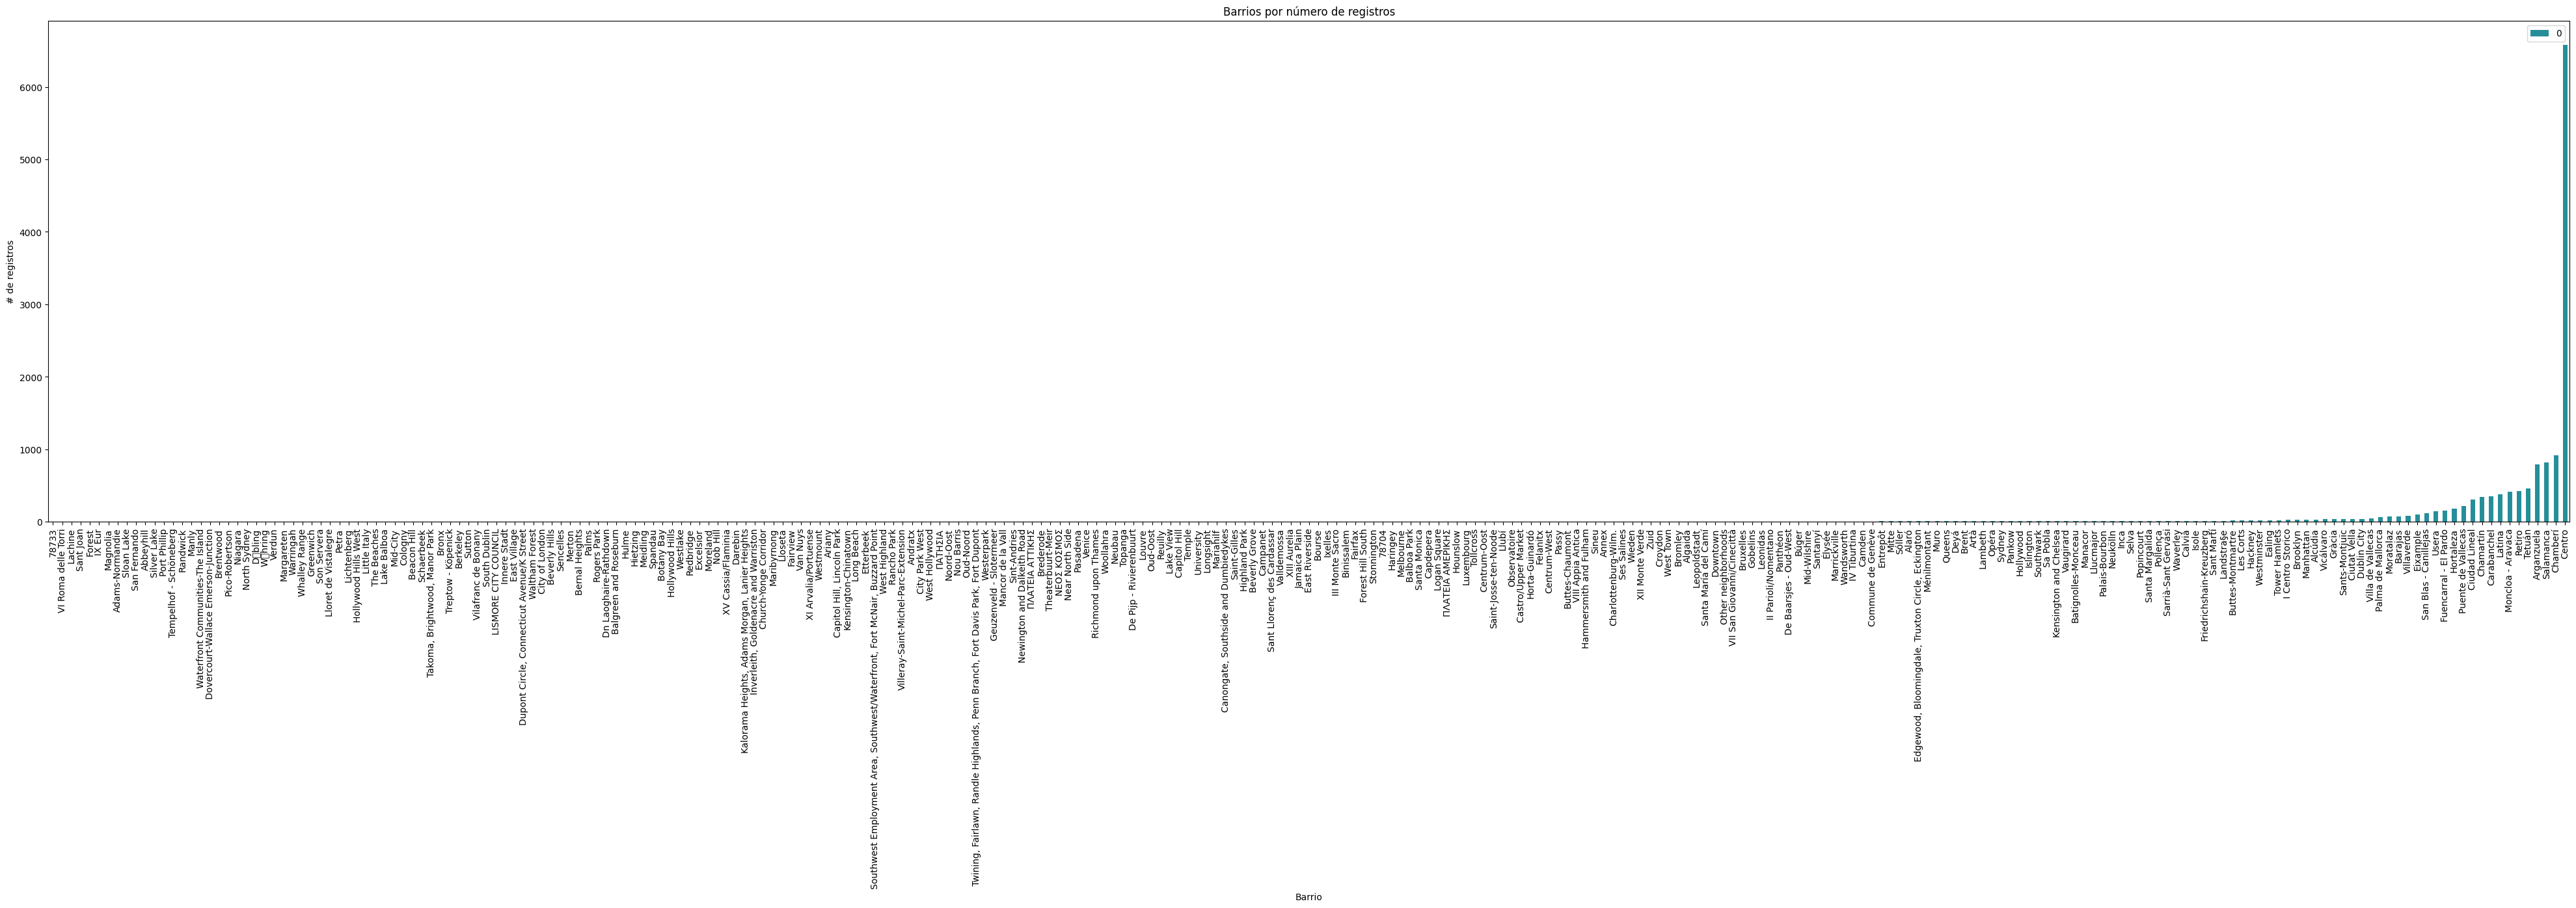

Número de barrios: 273


In [29]:
from collections import Counter

# Número de registros en cada barrio
nb_counts = Counter(df_comb["Final Neighbourhood"])
tdf = pd.DataFrame.from_dict(nb_counts, orient='index').sort_values(by=0)

# Dibujamos
ax = tdf.plot(kind='bar', figsize = (50,10), color = '#007A87', alpha = 0.85)
ax.set_title("Barrios por número de registros")
ax.set_xlabel("Barrio")
ax.set_ylabel("# de registros")
plt.show()

print("Número de barrios:", len(nb_counts))

Hay en total 273 barrios pero se puede observar que sólo hay unos pocos con datos, por ello, eliminaremos 200 barrios ya que no nos aportan ninguna información.

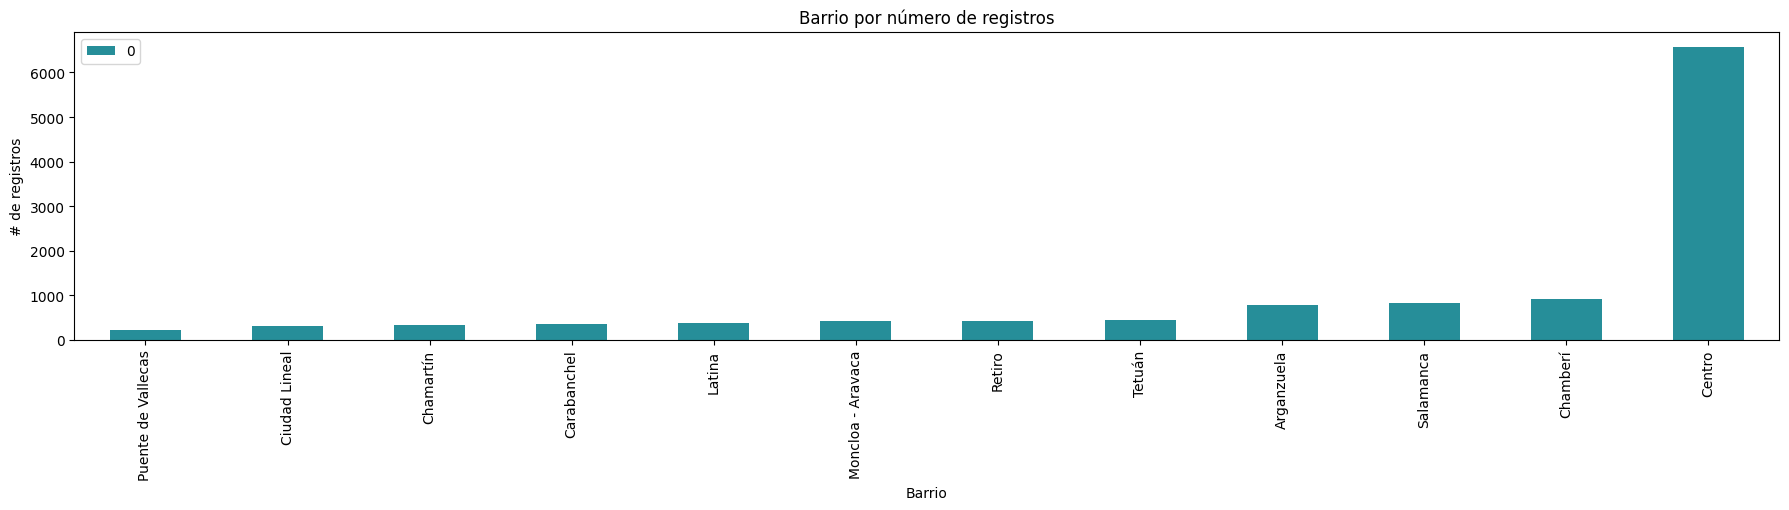

Número de registros eliminado:  2114
Número de Barrios: 12


In [30]:
df_comb = remove_entries(df_comb, 200, "Final Neighbourhood", "Barrio")

In [31]:
df_comb["Property Type"].value_counts()

Apartment             10007
House                   824
Condominium             302
Bed & Breakfast         299
Loft                    252
Other                   187
Dorm                     35
Guesthouse               32
Hostel                   15
Chalet                    7
Boutique hotel            6
Townhouse                 6
Serviced apartment        5
Casa particular           3
Earth House               3
Camper/RV                 2
Villa                     2
Tent                      1
Timeshare                 1
Bungalow                  1
Guest suite               1
Name: Property Type, dtype: int64

En este caso, también eliminaremos un número de porpoerty type debido a que hay algunos tipos que sólo aparecen menos de 50 veces o incluso sólo una vez.

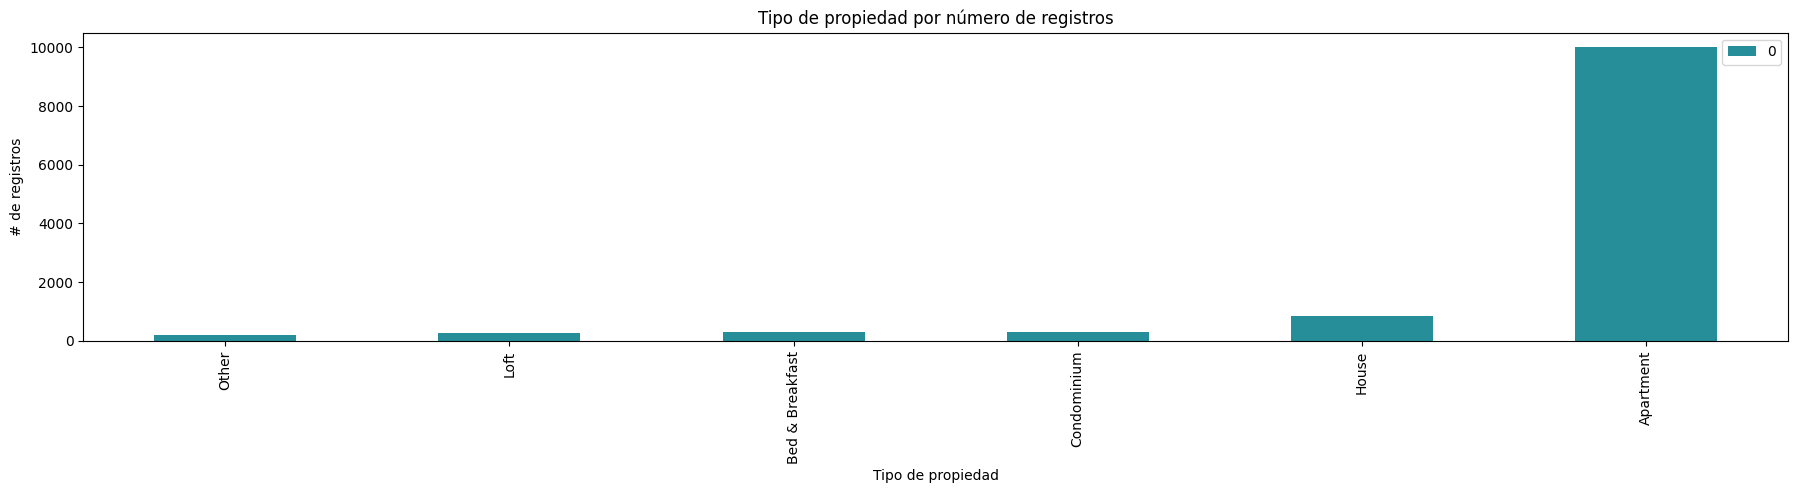

Número de registros eliminado:  120
Número de Tipo de propiedads: 6


In [32]:
# Eliminamos todos aquellos registros con menos de 100 valores, para reducir la dimensionalidad.
df_comb = remove_entries(df_comb, 100, "Property Type", "Tipo de propiedad")

In [33]:
df_comb["Bed Type"].value_counts()

Real Bed         11591
Pull-out Sofa      226
Futon               36
Couch               14
Airbed               4
Name: Bed Type, dtype: int64

En lso tipos de cama sólo vaos a seleccionar los 'Real Bes' y el 'Pull-out Sofa'.

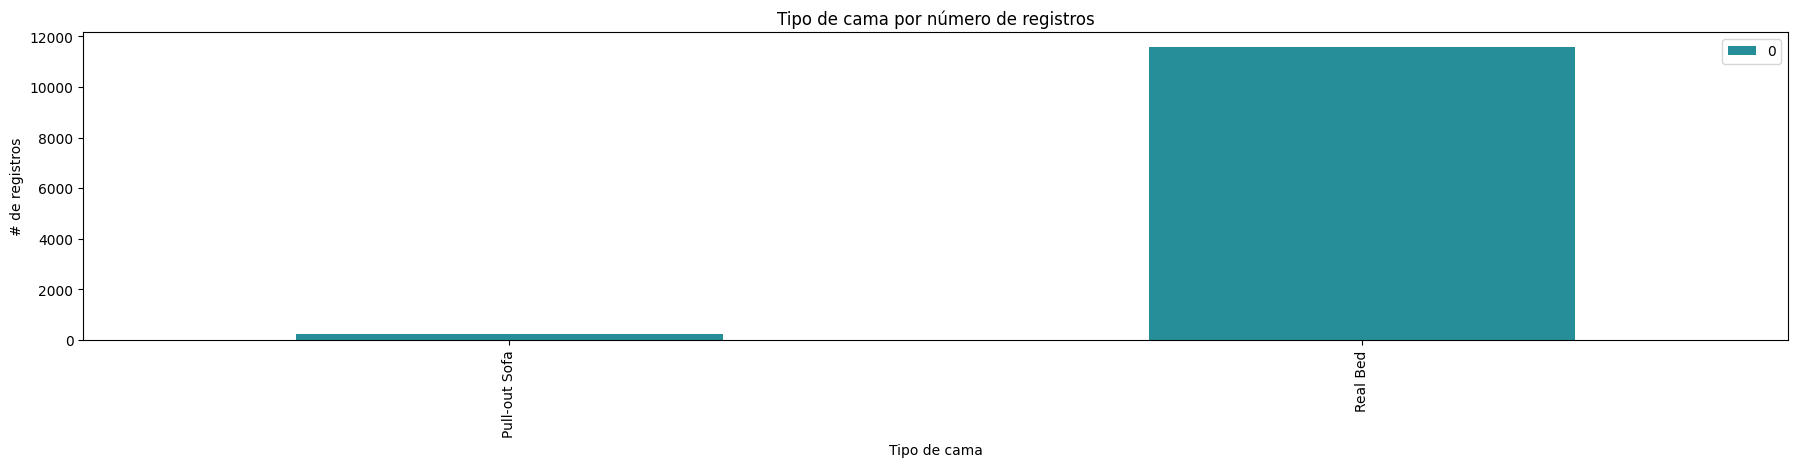

Número de registros eliminado:  54
Número de Tipo de camas: 2


In [34]:
# Eliminamos todos aquellos registros con menos de 100 valores, para reducir la dimensionalidad.
df_comb = remove_entries(df_comb, 100, "Bed Type", "Tipo de cama")

In [35]:
# Room type no tiene missing values y está decentemente balanceada
df_comb["Room Type"].value_counts()

Entire home/apt    7261
Private room       4425
Shared room         131
Name: Room Type, dtype: int64

En este caso, nos quedaremos con todos los tipos de habitación.

In [36]:
df_comb["Cancellation Policy"].value_counts()

strict             4499
flexible           3676
moderate           3636
super_strict_60       4
super_strict_30       2
Name: Cancellation Policy, dtype: int64

En Cancellation Policy nos quedaremos con las categorías 'strict', 'flexible' y 'moderate'.

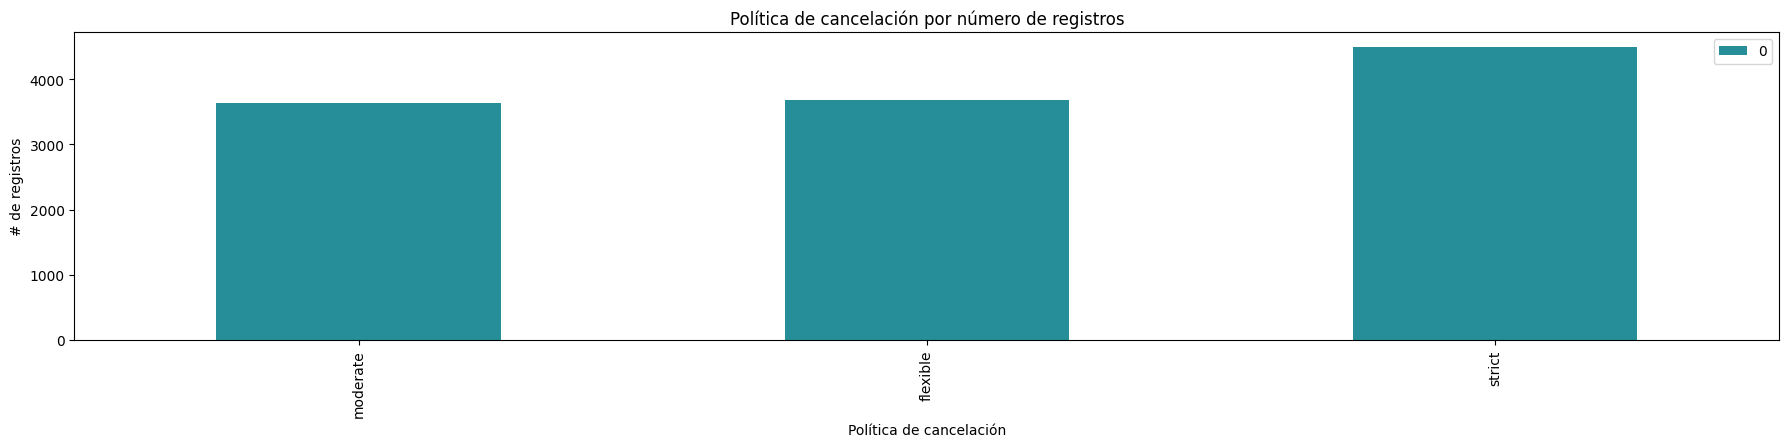

Número de registros eliminado:  6
Número de Política de cancelacións: 3


In [37]:
df_comb = remove_entries(df_comb, 100, "Cancellation Policy", "Política de cancelación")

In [38]:
columnas_object = df_comb.select_dtypes(include=['object']).columns.tolist()
print(columnas_object)

['Host Response Time', 'Property Type', 'Room Type', 'Bed Type', 'Cancellation Policy', 'Final Neighbourhood']


Hemos probado hacer onehotencoding con las variables 'Bed Type', 'Room Type' y 'Cancellation Policy', pero afecta a los resultados, porque si hacemos la transformación de las variables categóricas con la siguiente función en los árboles de decisión (simple, random forest y bagging) me sale que la primera variable explicativa es room type, en cambio, si utilizo onehotencoding me sale las últimas variables explicativas al dividir en tres secciones, por ello, hemos decidido que vamos a utilizar la función proporcionada en el notebook auxiliar de la tarea.

En calc_smooth_mean asigna a cada categoría un valor numérico en función de su relación con la variable objetivo, es decir, el precio de los alojamientos, en este caso con esta función asigna la media suavizada de la variable precio.

Voy a hacer catboost con el resto

In [39]:
categorical = ['Host Response Time', 'Property Type','Room Type', 'Bed Type', 'Cancellation Policy', 
 'Final Neighbourhood'
]

for c in categorical:
    df_comb[c] = calc_smooth_mean(df_comb, by=c, on='Price', m=300)

cols = df_comb.columns.tolist()
cols.insert(0, cols.pop(cols.index('Price')))
df_comb = df_comb[cols]

df_comb.fillna(df_comb.mean(), inplace=True)

df_comb.shape

(11811, 26)

In [40]:
df_comb['Property Type'].unique()

array([62.22542315, 60.98232167, 64.14096658, 53.27153493, 58.81565109,
       48.16172928])

In [41]:
df_comb['Final Neighbourhood'].unique()

array([60.89315293, 66.36267269, 62.13562112, 55.01931631, 47.23054113,
       49.77445001, 61.44734326, 58.68379354, 46.19789335, 51.45579843,
       49.5267754 , 66.59672477])

In [42]:
df_comb['Price'].describe()

count    11811.000000
mean        60.754636
std         35.844890
min          9.000000
25%         32.000000
50%         54.000000
75%         80.000000
max        199.000000
Name: Price, dtype: float64

## SOBRE ESTE NUEVO DATAFRAME CON TODOS LOS CAMBIOS VAMOS A HACER OTRO ANÁLISIS EXPLORATORIO

In [43]:
#A continuación vemos el tipo de variables que hay y no hay object solo de tipo float e int.
df_comb.dtypes

Price                  float64
Host Response Time     float64
Host Response Rate     float64
Host Verifications       int64
Latitude               float64
Longitude              float64
Property Type          float64
Room Type              float64
Bathrooms              float64
Bedrooms               float64
Beds                   float64
Bed Type               float64
Amenities                int64
Security Deposit       float64
Cleaning Fee           float64
Guests Included          int64
Extra People             int64
Minimum Nights           int64
Maximum Nights           int64
Availability 365         int64
Number of Reviews        int64
Cancellation Policy    float64
Features                 int64
Average Review         float64
Final Neighbourhood    float64
Years Being Host       float64
dtype: object

In [44]:
#Se puede observar que tampoco hay valores nulos
df_comb.isnull().sum()

Price                  0
Host Response Time     0
Host Response Rate     0
Host Verifications     0
Latitude               0
Longitude              0
Property Type          0
Room Type              0
Bathrooms              0
Bedrooms               0
Beds                   0
Bed Type               0
Amenities              0
Security Deposit       0
Cleaning Fee           0
Guests Included        0
Extra People           0
Minimum Nights         0
Maximum Nights         0
Availability 365       0
Number of Reviews      0
Cancellation Policy    0
Features               0
Average Review         0
Final Neighbourhood    0
Years Being Host       0
dtype: int64

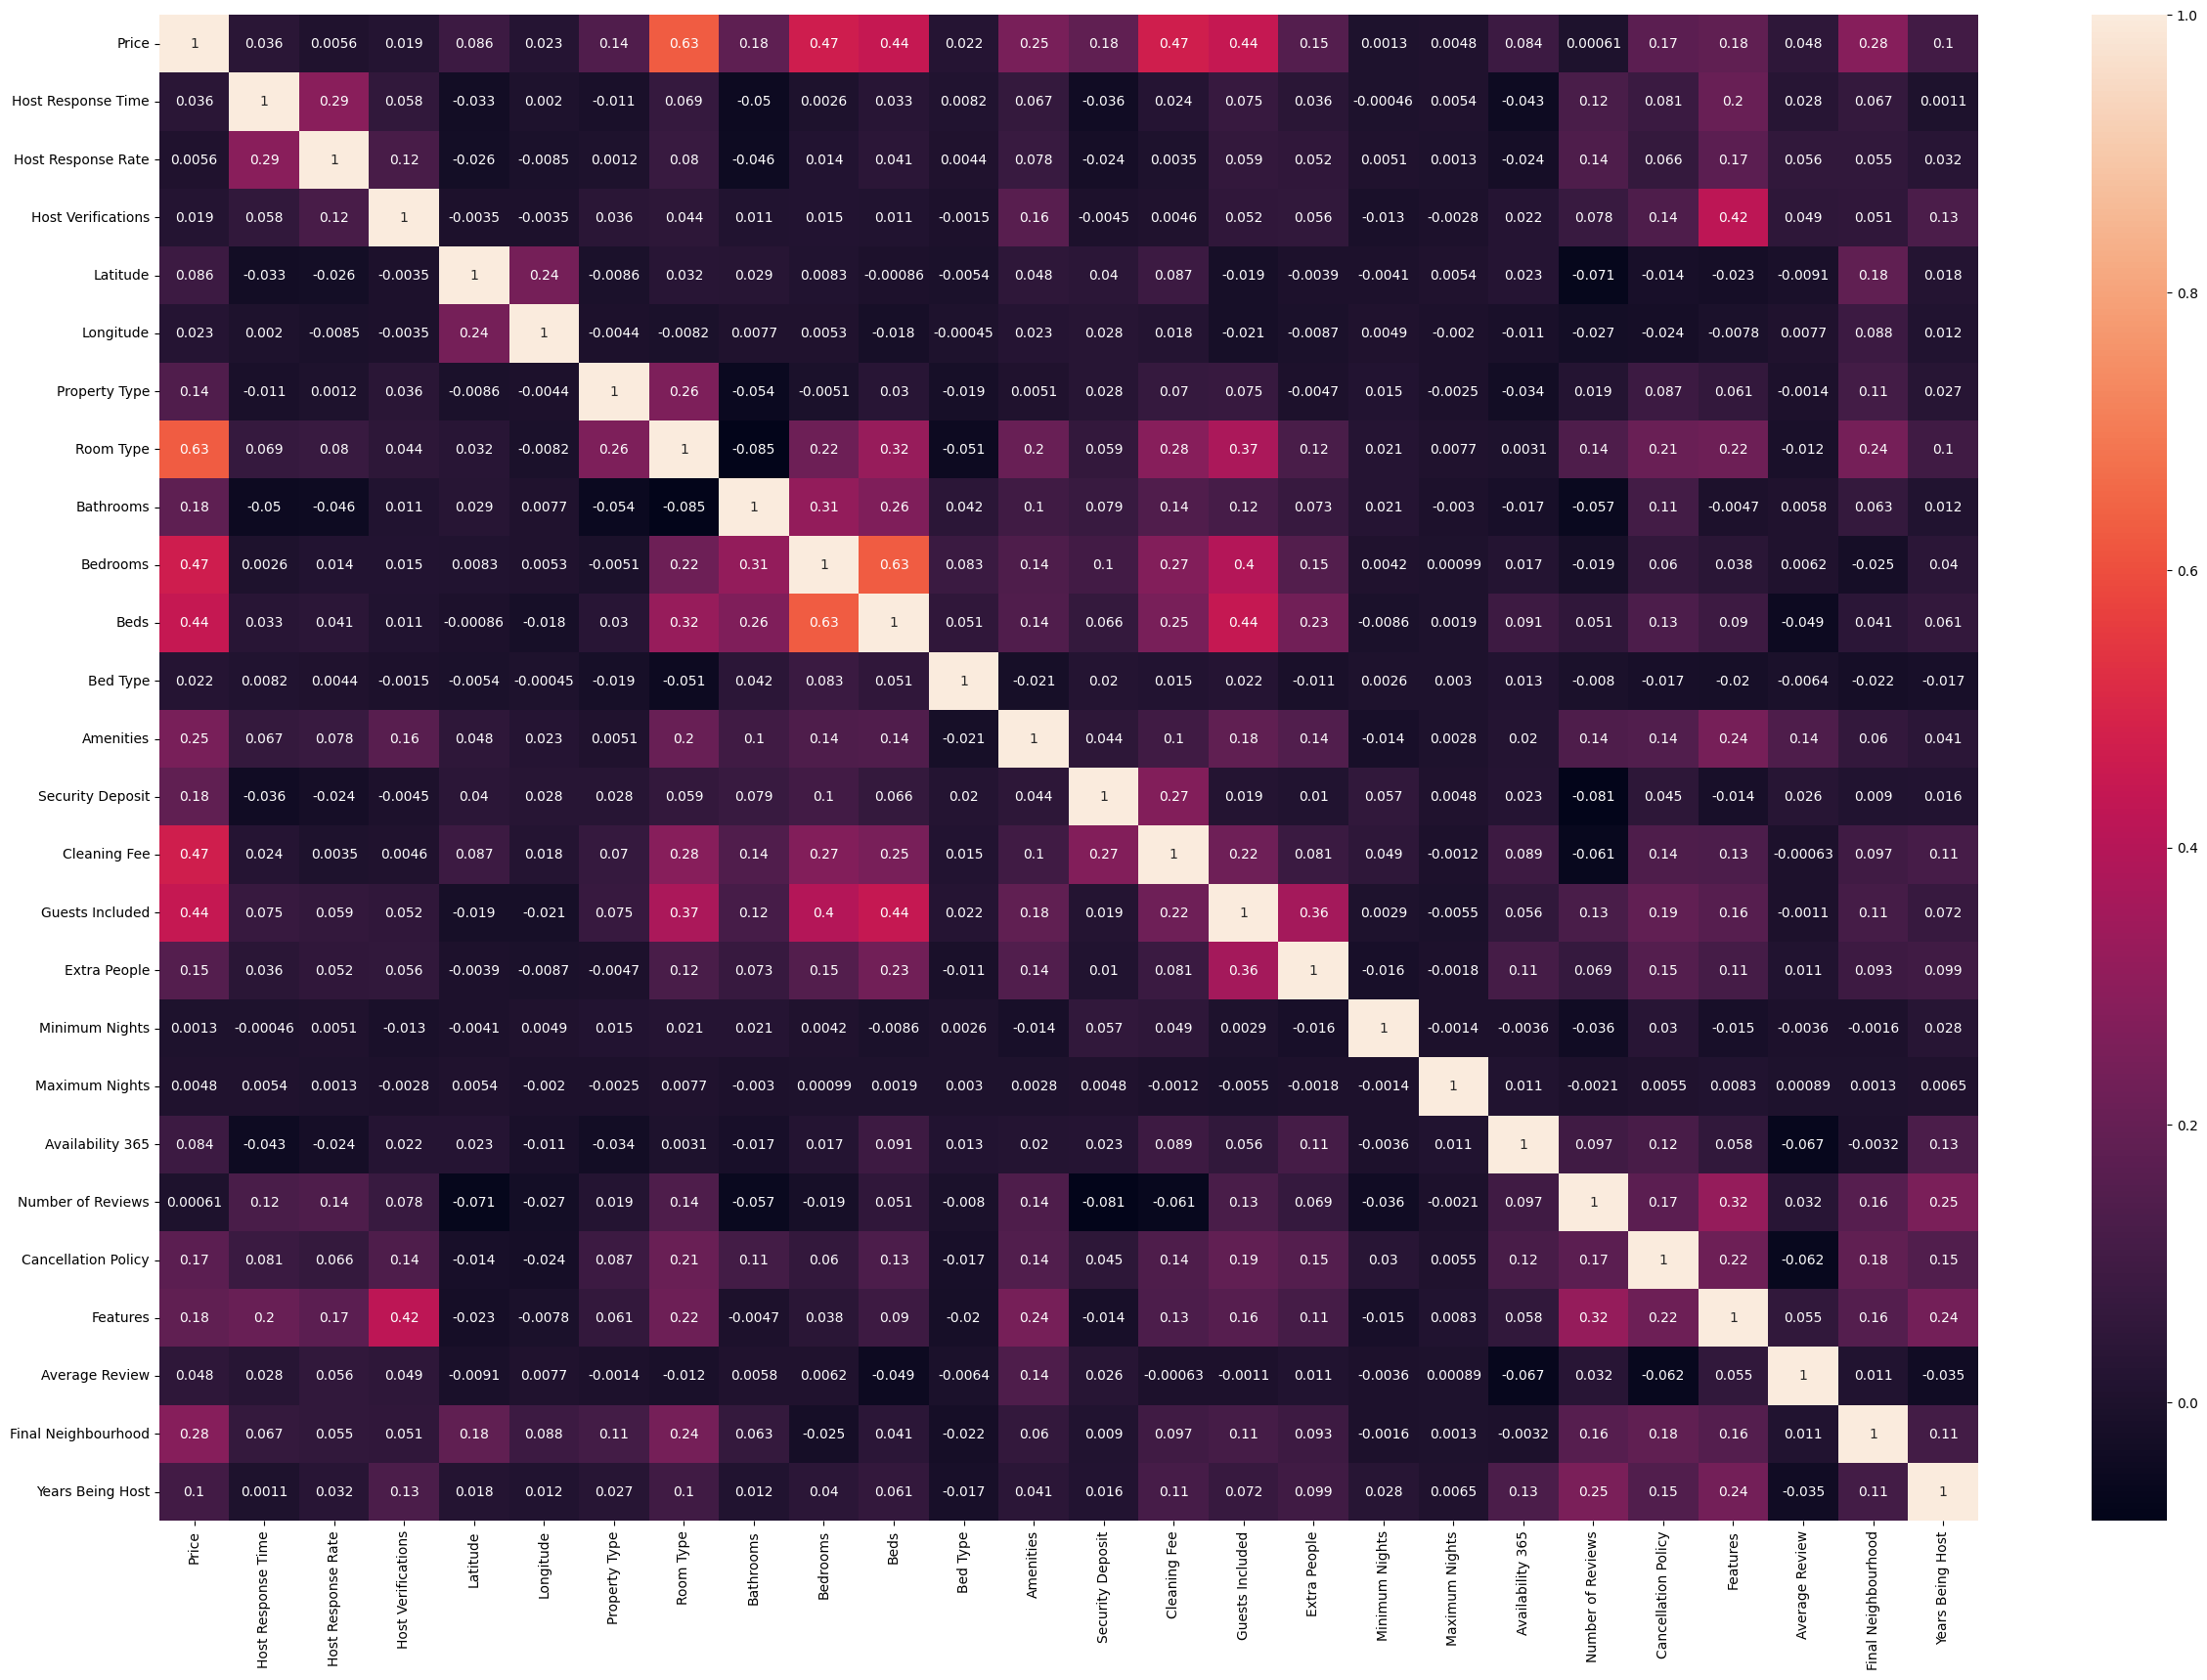

In [45]:
continuas_corr = df_comb.corr(method='pearson')

plt.figure(figsize = (30,20))
sns.heatmap(continuas_corr, annot=True)
plt.show()

En este gráfico de correlaciones a diferencia del anterior se puede ver que no hay casos de colinealidad, puesto que hemos eliminado aquellas variables que explicaban lo mismo.

TÉCNICAS DE REGRESIÓN:
- Regresión lineal logística
- KNN
- Árboles de clasificación simple (ÍNDICE GUINI, debemos minimizarlo)
- Random forest y baggin classifier es cuando veamos que los anteriores no han servido
- Gradientboosting
- 

# **SEPARACIÓN** **DE** **TRAIN** **Y** **TEST**

In [46]:
#Al ser nuestro objetivo un evaluador de precios vamos a ver si está balanceado nuestra variable objetivo siendo Price.
df['Price'].describe()

count    14763.000000
mean        73.561471
std         72.062050
min          9.000000
25%         34.000000
50%         55.000000
75%         86.000000
max        999.000000
Name: Price, dtype: float64

In [47]:
#La dimensión de nuestro dataframe, columnas y filas
print('El dataframe tiene', df_comb.shape[1], 'columnas y' ,df_comb.shape[0], 'filas')

El dataframe tiene 26 columnas y 11811 filas


In [48]:
from sklearn.model_selection import train_test_split

In [49]:
df_train, df_test = train_test_split(df_comb, test_size=0.2)

In [50]:
X_train = df_train.drop(['Price'], axis=1)
y_train = df_train['Price']

In [51]:
X_test = df_test.drop(['Price'], axis=1)
y_test = df_test['Price']

La variable objetivo esta bien balanceada, porque la media es similar al precio antes de hacer el split de train y test, a la vez que el valor mínimo y máximo.

# **VALORACIÓN** **DE** **TÉCNICAS**



A la hora de analizar cuál es la mejor modelo sólo vamos a analizar las métricas score (coeficiente de determinación) y error cuadrático medio. Estas son dos métricas comunes y las más útiles para evaluar la calidad y precisión de los modelos de regresión.

Coeficiente de determinación (R2): El coeficiente de determinación, también conocido como R2, es una métrica que indica la proporción de la varianza en la variable de respuesta (precio en nuestro caso) que se puede explicar por las variables independientes (características del alojamiento). R2 varía de 0 a 1, donde 0 indica que el modelo no explica nada de la variabilidad y 1 indica que el modelo explica toda la variabilidad. Un valor alto de R2 sugiere que el modelo es capaz de capturar y predecir bien la relación entre las variables.

Error cuadrático medio (ECM): El error cuadrático medio es una medida de la discrepancia entre los valores reales y los valores predichos por el modelo. El ECM se calcula tomando la diferencia entre cada valor real y su valor predicho, elevando al cuadrado y tomando el promedio de estos errores al cuadrado. Cuanto más cercano a cero sea el ECM, mejor será el modelo en términos de ajuste y precisión.

## **REGRESIÓN** **LINEAL**

La regresión lineal podría ser una buena técnica para analizar en este proyecto de evaluación automática de precios de alojamientos de Airbnb por las siguientes razones:

Relación lineal: La regresión lineal es una técnica adecuada cuando se sospecha que existe una relación lineal entre las variables . En el caso de los alojamientos de Airbnb, es posible que características como el tamaño del alojamiento, la cantidad de habitaciones, los servicios ofrecidos, entre otros, tengan una relación lineal con el precio.

Simplicidad y eficiencia: La regresión lineal es un modelo relativamente simple y computacionalmente eficiente en comparación con otros algoritmos más complejos. Puede ser adecuado para este proyecto, especialmente si el objetivo principal es obtener un modelo rápido y fácil de implementar.

Sin embargo, es importante tener en cuenta que la regresión lineal también tiene sus limitaciones. Puede no ser adecuada si la relación entre las variables no es lineal o si existen interacciones complejas entre las características. En ese caso, podría ser necesario considerar otros modelos de regresión más avanzados.


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [53]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [54]:
X_train_scaled = scaler.transform(X_train)

In [55]:
lr.fit(X_train_scaled, y_train)

LinearRegression()

**Score**

In [56]:
lr.score(X_train_scaled, y_train)

0.6334686831622238

In [57]:
X_test_scaled = scaler.transform(X_test)

In [58]:
predictions = lr.predict(X_test_scaled)

**Score** (coeficiente de determinación)

In [59]:
score_lr = lr.score(X_test_scaled, y_test)
score_lr

0.6089634934244491

El score es cercano al 50%, lo que significa que el modelo de regresión lineal es capaz de expliacar en una cercania al 50% de la variabilidad en la variable a predecir que es el precio. Este porcentaje se considera decente, pero creemos que podemos encontrar otro modelo por el cual lograr mejorarlo. 

In [60]:
results_lr = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)

In [61]:
results_lr.head()

,Price,PricePredicted,SquaredError
13553,145.0,112.846809,1033.827693
11685,90.0,75.508831,209.993972
1950,60.0,62.891217,8.359136
2060,42.0,46.589872,21.066925
2478,110.0,71.777901,1460.928851


Aquí se puede observar la diferencia entre el precio real y el precio previsto, con su error cuadrático medio

Error cuadrático medio

In [62]:
results_lr['Price'].describe()

count    2363.000000
mean       59.004232
std        33.689736
min        10.000000
25%        34.000000
50%        52.000000
75%        76.500000
max       195.000000
Name: Price, dtype: float64

In [63]:
rmse_1 = np.sqrt(results_lr['SquaredError'].mean())
rmse_1

21.06271451493287

In [64]:
from sklearn.metrics import mean_squared_error
rmse_lr = mean_squared_error(results_lr['Price'], results_lr['PricePredicted'], squared=False)
rmse_lr

21.06271451493287

Un valor de ECM de 22.5 indica que, en promedio, las predicciones del modelo cambia en aproximadamente 22.5 unidades al cuadrado del valor real, siendo el valor máximo de precio 195 y el valor mínimo un 10.

In [65]:
# porcentaje de error medio #
rerror_lr = round(rmse_lr/results_lr['Price'].mean()*100,2)
rerror_lr

35.7

El procentaje del error medio se aproxima a un 40% lo que implica que, en promdedio, las predicciones efectuadas por este modelo difieran en un 40% de los valores reales. Aunque en muchos modelos este error sería moderado o inluso aceptable, los requisitos predispuestos para nuestro equipo es reducirlo debido a que buscamos una precisión mas elevada.

## **KNN**

El método K-Nearest Neighbors (K-NN) es un algoritmo de aprendizaje supervisado utilizado para la clasificación y regresión. 
El algoritmo K-NN se basa en encontrar "los vecinos más cercanos" de una muestra de prueba no etiquetada con unos datos de entrenamiento si etiquetados. 
En los problemas de regresión se utiliza el promedio de los k vecinos mas cercanos para hacer una predicción sobre una clasificación.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
# Crear el clasificador KNN
knn = KNeighborsClassifier(n_neighbors=8)

In [67]:
# Entrenar el clasificador con los datos de entrenamiento
knn_scaler = StandardScaler()
knn_scaler.fit(X_train)

StandardScaler()

In [68]:
X_train_data_scaled_1 = knn_scaler.transform(X_train)

In [69]:
knn.fit(X_train_data_scaled_1 , y_train)

KNeighborsClassifier(n_neighbors=8)

In [70]:
X_test_data_scaled_1 = knn_scaler.transform(X_test)

**Score**

In [71]:
score_knn = knn.score(X_test_data_scaled_1, y_test)
score_knn

0.10579771476936098

Según el score del método knn esta técnica no puede explicar ninguna variabilidad de la variable objetivo y no hay relación entre las variables predictoras y la variable objetivo. Este 9,28% es un valor de explicación insignificante y tiene una capacidad de predecir nuestra variable objetivo a través de las explicativas mínima.

In [72]:
predictions_1 = knn.predict(X_test_data_scaled_1)  

In [73]:
results_knn = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_1)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_knn.head()


,Price,PricePredicted,SquaredError
13553,145.0,120.0,625.0
11685,90.0,40.0,2500.0
1950,60.0,50.0,100.0
2060,42.0,18.0,576.0
2478,110.0,45.0,4225.0


Voy a probar con varios parámetros de K, y escogeré aquel que mejor se adapte.
En el caso de k =5, no parece que prediga muy bien debido a que su porcentaje de error cuadrático medio es de un 45%, con k=6 el procentaje es de 44,7%, con k=7 es de 44,4%, K= 8 UN 44,6%; por lo tanto, escogeremos k = 7.

In [74]:
rmse_1 = np.sqrt(results_knn['SquaredError'].mean())
rmse_1

26.177928891844

In [75]:
from sklearn.metrics import mean_squared_error
rmse_knn = mean_squared_error(results_knn['Price'], results_knn['PricePredicted'], squared=False)
rmse_knn

26.177928891844

In [76]:
# porcentaje de error medio #
rerror_knn = round(rmse_knn/results_knn['Price'].mean()*100,2)
rerror_knn

44.37

En cuanto al error cuadrático medio, obtenemos un valor cercano al 50% por lo que existe una discrepancia moderadamente elevada,

A través de este modelo hemos obtenidos resultados muy negativos y diferenciados de nuestros objetivos, si hablamos del R2 podemos observar que es muy insignificante y teniendo una capacidad ecplicativa mínima y en cuanto al Error Cuadrático Medio, no es tan negativo pero tampoco es destacable.

## **ÁRBOLES** **DE** **DECISIÓN** **SIMPLES**

Los arboles de decisiones tambien son un tipo de algoritmo utilizado para regresión. Se basa en un conjunto de nodos con forma de arbol donde cada rama es una posible respuesta y el objetivo es usar la rama mas ventajosa para nuestra variable objetivo. 
Como trataos con un problema de regresión nuestro criterio a usar sera el de impurezas de "Gini Index", el cual es utilizada para medir la pureza de los diferentes nodos del árbol y decidir el siguiente nivel de opciones o nodos subsiguientes

In [77]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

Con el siguiente código voy a analizar cuál es el max_depth óptimo.

best mean cross-validation score: 0.632
best parameters: {'max_depth': 6}


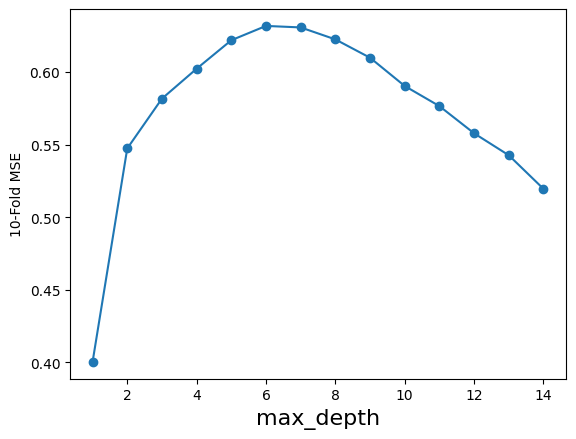

In [78]:
from sklearn.model_selection import GridSearchCV
from sklearn import tree


maxDepth = range(1,15)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('10-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

A pesar de que el max_depth óptimo sea 6, vamos a trabajar con 2, primero para tener una mejor visualización gráfica y porque el gini_index es más bajo con max_depth 2, de todas maneras me sirve este análisis para random forest y gradientboost.

In [79]:
regTree = DecisionTreeRegressor(max_depth=2, min_samples_split=2, min_samples_leaf=1, random_state=42)

Max_depth es la profundidad máxima del árbol, el min_samples_split es el número mínimo de muestras requeridas para dividir un nodo interno y min_samples_leaf es el número mínimo de muestras requeridas en un nodo hoja.

In [80]:
regTree.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

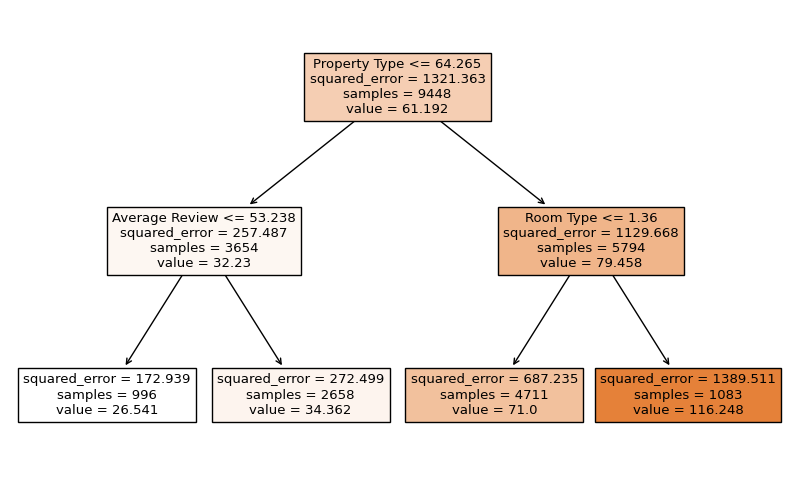

In [81]:
plt.figure(figsize=(10, 6))
plot_tree(regTree, feature_names=df_test.columns, filled=True)
plt.show()

In [82]:
#Esto es para obtener el gini del árbol de decisión
gini_general = regTree.score(X_test, y_test)
gini_general

0.530037654007935

He ido reduciendo el índice de gini reduciendo los  los valores del max_depth, del min_samples_split y del min_samples_leaf.

In [83]:
#Esto es para obtener el gini de cada variable del árbol de decisión
gini_index = regTree.feature_importances_
gini_index.mean()

0.04

En cambio, la media del gini index de las variables es muy pequeña, de un 0,04.

**Score**

In [84]:
score_arbol = regTree.score(X_test, y_test)
score_arbol

0.530037654007935

En árboles de decisión no hace falta escalar o normalizar los datos, tampoco se aplicará transform.
El score obtenido según este algoritmo es de un 52,5% lo que se asemeja mucho a la regresión linel por lo que es un coeficiente de determinacion significativo pero no suficiente por lo que seguiremos buscando el método óptimo para este trabajo.

In [85]:
predictions_2 = regTree.predict(X_test)

In [86]:
results_arbol = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_2)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_arbol.head()

,Price,PricePredicted,SquaredError
13553,145.0,116.248384,826.655416
11685,90.0,71.000000,361.000000
1950,60.0,71.000000,121.000000
2060,42.0,34.361550,58.345918
2478,110.0,71.000000,1521.000000


In [87]:
rmse_arbol= np.sqrt(results_arbol['SquaredError'].mean())
rmse_arbol

23.090706478399444

In [88]:
rmse_arbol = mean_squared_error(results_arbol['Price'], results_arbol['PricePredicted'], squared=False)
rmse_arbol

23.090706478399444

In [89]:
# porcentaje de error medio #
rerror_arbol = round(rmse_arbol/results_arbol['Price'].mean()*100,2)
rerror_arbol

39.13

El Error Cuadrático Medio (ECM) obtenido es de un 40% lo que esta entre los intervalos obtenidos en los métodos utilizados. 
Seguiremos buscando una mejora en este aspecto.

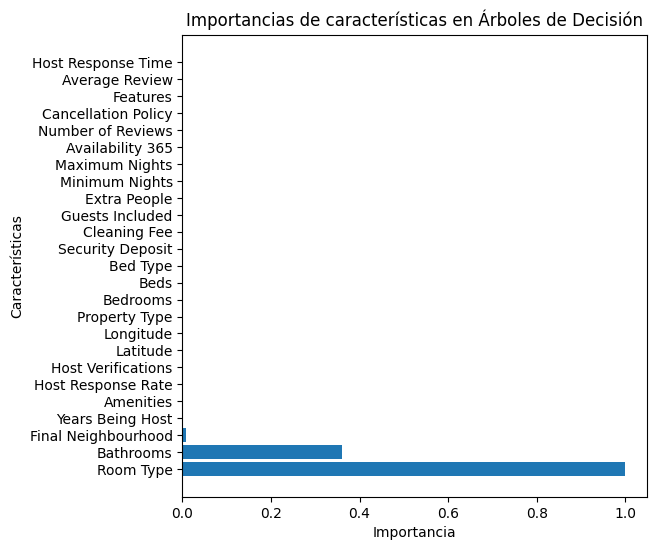

In [90]:
#Ver importancia de variables
features = df_comb.columns.drop(['Price'])
importances = regTree.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,6))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancias de características en Árboles de Decisión')
plt.show()
plt.show()

Las variables explicativas que más afectan a la variable objetivo (precio del alojamiento) según la técnica de árboles de decisión es el tipo de habitación (alojamiento entero, habitación privada y habitación compartida), el número de baños y el barrio.

## **RANDOM** **FOREST**

Random Forest es otro de los algoritmos que vamos a usar para este trabajo, este combina un conjunto de árboles de decisión para obtener una predicción mas precisa y estable.
Random Forest tiene comoo idea principal contruir múltiples árboles de decisión, cada uno encargado de entrenar una muestra aleatoria de los datos originales y seleccionar variables aleatorias. Estas carecterísticas de aleatoriedad son fundamentales para evitar el sobreajuste y aumentar la diversidad de árboles.

best mean cross-validation score: 0.735
best parameters: {'max_depth': 14}


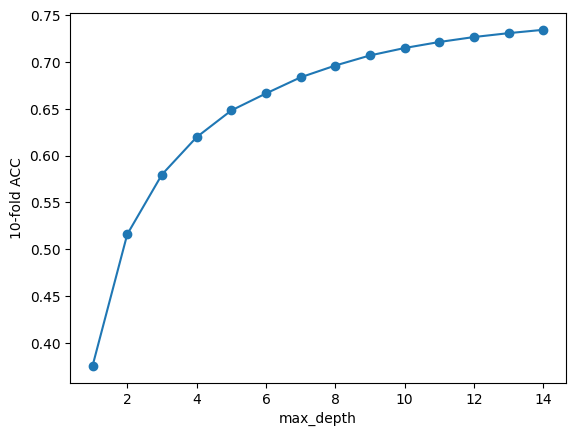

In [91]:
from sklearn.ensemble import RandomForestRegressor

# grid search
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestRegressor(random_state=0, n_estimators=200, max_features='sqrt'), 
                    param_grid=tuned_parameters,cv=5) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

PONE QUE EL MAX_DEPTH ES 14

In [92]:
forest_model = RandomForestRegressor(max_depth = 14)
forest_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=14)

**Score**

In [93]:
score_forest= forest_model.score(X_test, y_test)
score_forest

0.7156881024266515

Utilizando este algoritmo, nos encontramos un score (R2) que se encuentra dentro de nuestro intervalo de interés siendo de un 71%, lo que nos informa del alto porcentaje explicativo de este modelo.

In [94]:
predictions_3 = forest_model.predict(X_test)

In [95]:
results_random = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_3)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_random.head()

,Price,PricePredicted,SquaredError
13553,145.0,130.913873,198.418980
11685,90.0,81.803508,67.182485
1950,60.0,65.432345,29.510374
2060,42.0,31.816049,103.712859
2478,110.0,65.220935,2005.164669


In [96]:
rmse_random= np.sqrt(results_random['SquaredError'].mean())
rmse_random

17.9598707185922

In [97]:
rmse_random = mean_squared_error(results_random['Price'], results_random['PricePredicted'], squared=False)
rmse_random

17.9598707185922

In [98]:
# porcentaje de error medio #
rerror_random = round(rmse_random/results_random['Price'].mean()*100,2)
rerror_random

30.44

El ECM en este caso se ve algo reducido de lo visto anteriormente, por lo que este modelo se convierte en beneficioso para nuestro objetivo.

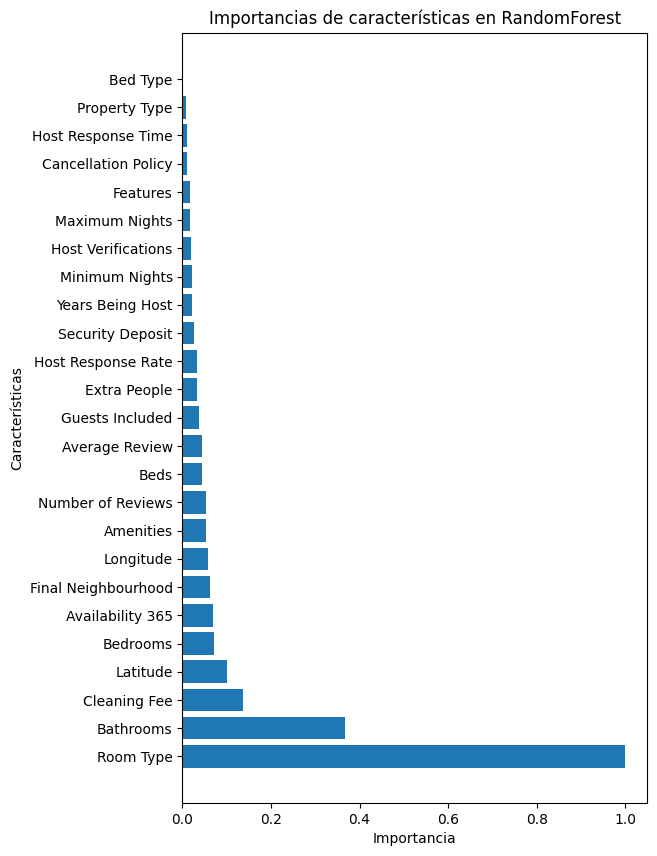

In [99]:
#Ver importancia de variables
features = df_comb.columns.drop(['Price'])
importances = forest_model.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancias de características en RandomForest')
plt.show()
plt.show()

Aquí podemos ver que variables explicativas tienen mayor peso en la variables objetivo, que en este caso es el precio de los airbnb. Las primeras variables que explican el precio, es el tipo de habitación y el número de baños al igual que en la técnica de árbol de decisión, auqnue aquí tiene en cuenta más variables explicativas, puesto que otras variables explicativas son la tarifa de limpieza, la localización, la disponibilidad, el número de habitaciones.

## **BAGGING**

El modelo de Bagging al igual que el Random Forest es una técnica de aprendizaje conjunto (ensamble learning) testada para mejorar la estabilidad y la precisión.
Esta técnica se basa en generar diferentes muestras aleatorias a partir de los datos orignales mediante el muestreo por reemplazo. Cada muestra se utiliza para entrenar un modelo base, generalmente del mismo tipo, pero con diferentes instancias de datos.

In [100]:
from sklearn.ensemble import BaggingRegressor
bag_model = BaggingRegressor()

Voy a analizar que hiperparámetros son los pertinentes para Bagging Regressor.

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingRegressor is deprecated in favor of 'estimator'. See BaggingRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingRegressor is deprecated in favor of 'estimator'. See BaggingRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingRegressor is deprecated in favor of 'estimator'. See BaggingRegressor's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator

best mean cross-validation score: 0.700
best parameters: {'base_estimator__max_depth': 9}


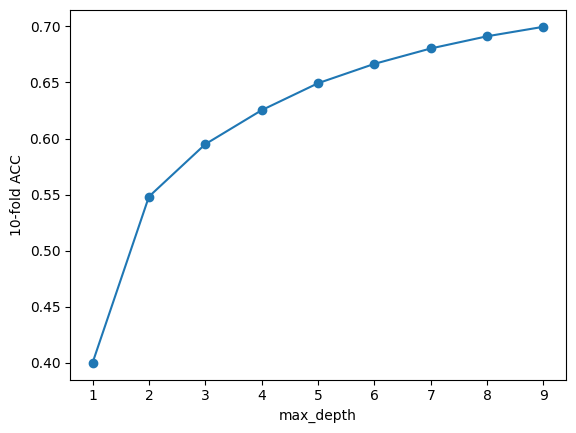

In [102]:
# grid search
maxDepth = range(1,10)
tuned_parameters = {'base_estimator__max_depth': maxDepth}

grid = GridSearchCV(BaggingRegressor(DecisionTreeRegressor(), random_state=0, n_estimators=50), 
                    param_grid=tuned_parameters,cv=3) 
grid.fit(X_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('10-fold ACC')

plt.show()

In [103]:
base_estimator = DecisionTreeRegressor(max_depth=9)

# Crear un BaggingRegressor con el estimador base
bag_model = BaggingRegressor(base_estimator=base_estimator, n_estimators=10)
bag_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=9))

**Score**

In [104]:
score_bag = bag_model.score(X_test, y_test)
score_bag

0.6872501167787857

EL coeficiente de determinación entra dentro de nuestro interés de analisis sin llegar a superar al Random Forest, pero con un valor muy significativo. 

In [105]:
predictions_4 = bag_model.predict(X_test)

In [106]:
results_bag = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_4)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_bag.head()

,Price,PricePredicted,SquaredError
13553,145.0,126.109326,356.857546
11685,90.0,81.139489,78.508660
1950,60.0,67.004884,49.068406
2060,42.0,33.847693,66.460111
2478,110.0,69.395251,1648.745644


In [107]:
rmse_bag= np.sqrt(results_bag['SquaredError'].mean())
rmse_bag

18.836675978296007

In [108]:
rmse_bag = mean_squared_error(results_bag['Price'], results_bag['PricePredicted'], squared=False)
rmse_bag

18.836675978296007

In [109]:
# porcentaje de error medio #
rerror_bag = round(rmse_bag/results_bag['Price'].mean()*100,2)
rerror_bag

31.92

En cuanto al error cuadrático medio, existe una discrepancia moderada entre las predicciones del modelo y los valores reales siendo de un 33,38%.
Aun estando por debajo de algunas de las anteriores, Random Forest tiene un valor algo inferior.

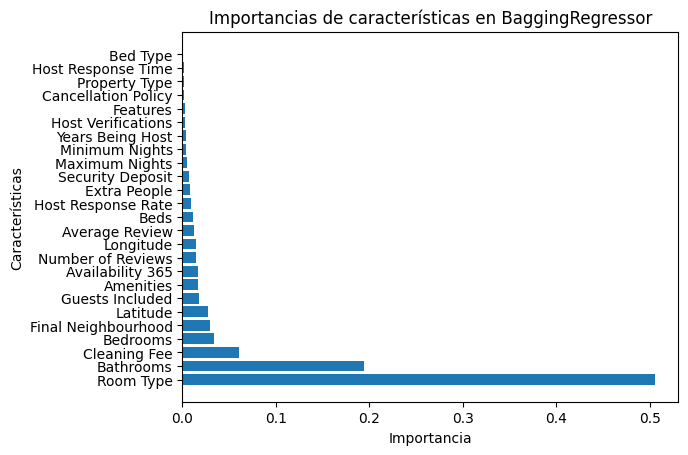

In [110]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag_model.estimators_
], axis=0)
features = df_comb.columns.drop(['Price'])

# Ordena las características y las importancias de forma descendente
sorted_indices = np.argsort(feature_importances)[::-1]
sorted_importances = feature_importances[sorted_indices]
sorted_names = [features[i] for i in sorted_indices]

#Gráfico
plt.barh(range(len(sorted_importances)), sorted_importances)
plt.yticks(range(len(sorted_importances)), sorted_names)
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancias de características en BaggingRegressor')
plt.show()

## **GRADIENT** **BOOST**

La técnica de Gradient Boost es tambien un algoritmo de aprendizaje conjunto que combina modelos débiles construyendo uno más fuerte.
EN comparación con el Bagging que hace uso de muestras aleatorias, esta técnica contruye de manera secuencial donde cada uno se focaliza en enmendar los errores cometidos por el anterior.

In [111]:
from sklearn.model_selection import cross_val_score
import multiprocessing
from sklearn.model_selection import RepeatedKFold

Hemos intentado hacer un gridsearch en gradient boost, pero está demasiado tiempo pensando y no llega a realizarse, por lo tanto, vamos a ir probando max_depths y empezaremos con max_depth de 6, debido que en el gridsearch del árbol de decisión ese es el max_depth.

In [112]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_model = GradientBoostingRegressor(max_depth = 6)

In [113]:
gradient_model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=6)

**Score**

In [114]:
score_gradient = gradient_model.score(X_test, y_test)
score_gradient

0.7305240413948331

En este último modelo nos encontramos con nuestro mejor coeficiente de determinación, siendo de un 72,5%.

In [115]:
predictions_5 = gradient_model.predict(X_test)

In [116]:
results_gradient = ( df_test
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_5)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_gradient.head()

,Price,PricePredicted,SquaredError
13553,145.0,126.599583,338.575348
11685,90.0,75.619356,206.802908
1950,60.0,61.428130,2.039555
2060,42.0,28.867833,172.453800
2478,110.0,62.383488,2267.332232


In [117]:
rmse_gradient= np.sqrt(results_gradient['SquaredError'].mean())
rmse_gradient

17.485002628006846

In [118]:
rmse_gradient = mean_squared_error(results_gradient['Price'], results_gradient['PricePredicted'], squared=False)
rmse_gradient

17.485002628006846

In [119]:
# porcentaje de error medio #
rerror_gradient = round(rmse_gradient/results_gradient['Price'].mean()*100,2)
rerror_gradient

29.63

Si nos fijamos en el porcentaje de error medio nos encontramos al igual que en el score con nuestro mejor dato de las técnicas utilizadas.

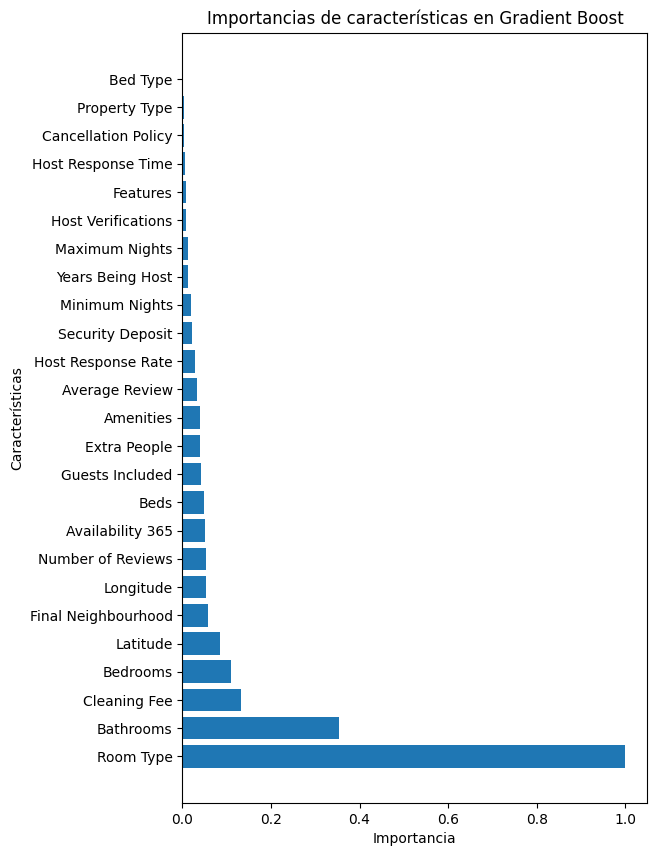

In [120]:
#Ver importancia de variables
features = df_comb.columns.drop(['Price'])
importances = gradient_model.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancias de características en Gradient Boost')
plt.show()
plt.show()

# **COMPARACIÓN TÉCNICAS**

**COEFICIENTE** **DE** **DETERMINACIÓN**

In [121]:
nombres = ['Modelo', 'Score']

# Definimos los datos para cada columna
modelos = ['Regresión Lineal', 'KNN','Árbol de decisión','Random Forest', 'Bagging Regressor', 'Gradient Boost' ] 
scores = [score_lr, score_knn, score_arbol, score_forest , score_bag, score_gradient]

# Creamos un diccionario con los datos
datos = {'Modelo': modelos,
         'Score': scores}

# Creamos el marco de datos utilizando el diccionario y los nombres de las columnas
score = pd.DataFrame(datos, columns=nombres)
score

,Modelo,Score
0,Regresión Lineal,0.608963
1,KNN,0.105798
2,Árbol de decisión,0.530038
3,Random Forest,0.715688
4,Bagging Regressor,0.687250
5,Gradient Boost,0.730524


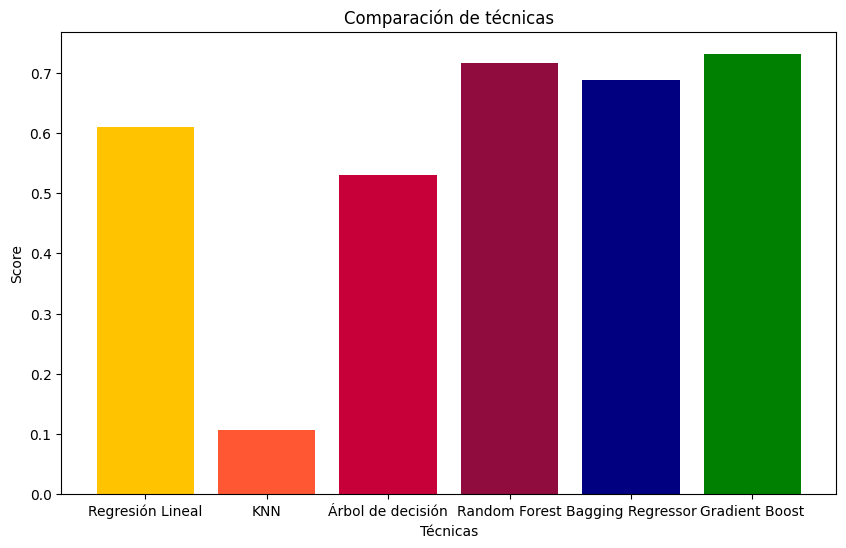

In [122]:
#Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
colores = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#000080', '#008000' ]  

ax.bar(modelos, scores, color = colores)

# Personalizar el gráfico
ax.set_xlabel('Técnicas')
ax.set_ylabel('Score')
ax.set_title('Comparación de técnicas')

# Mostrar el gráfico
plt.show()

Como hemos podido observar a lo largo del trabajo, aqui están los coeficientes de determinacion (R2) de cada una de las técnicas utilizadas. 
El método mas beneficioso para nuestra variable objetivo es "Gradient Boost", la cual esta algo por encima del 70%, por lo que a través de esta técnica se es capaz de explicar el 70% del resultado con las variables explicativas.
En su contrario, la técnica de K-NN tiene un R2 muy por debajo de lo que se suele considerar como aceptable en este tipo de modelos. 

**PORCENTAJE** **DE** **ERROR** **MEDIO**

In [123]:
nombres = ['Modelo', 'SquaredError']

# Definimos los datos para cada columna
modelos = ['Regresión Lineal', 'KNN','Árbol de decisión','Random Forest', 'Bagging Regressor', 'Gradient Boost' ]  
squarederror = [rmse_lr, rmse_knn, rmse_arbol, rmse_random , rmse_bag, rmse_gradient]

# Creamos un diccionario con los datos
datos = {'Modelo': modelos,
         'SquaredError': squarederror}

# Creamos el marco de datos utilizando el diccionario y los nombres de las columnas
score = pd.DataFrame(datos, columns=nombres)
score

,Modelo,SquaredError
0,Regresión Lineal,21.062715
1,KNN,26.177929
2,Árbol de decisión,23.090706
3,Random Forest,17.959871
4,Bagging Regressor,18.836676
5,Gradient Boost,17.485003


En este caso y al contraria que en el apartado anterior lo que buscamos es que el valor sea el mínimo posible ya que indica el error que comete el modelo. 
Lo destacable es que la misma técnica que consigue el coeficiente de detrminación mayor, también es la que consigue el error más bajo consiguiendo así que no haya ningún tipo de duda en que es la más eficaz, más precisa y con mayor valor para nuestra variable objetivo que es el precio.

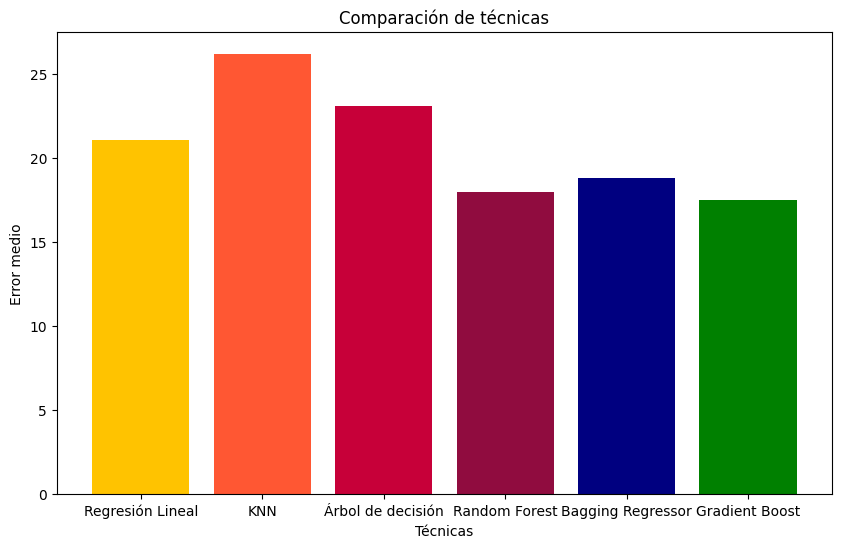

In [124]:
#Gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))
colores = ['#FFC300', '#FF5733', '#C70039', '#900C3F', '#000080' , '#008000'] 

ax.bar(modelos, squarederror, color = colores)

# Personalizar el gráfico
ax.set_xlabel('Técnicas')
ax.set_ylabel('Error medio')
ax.set_title('Comparación de técnicas')

# Mostrar el gráfico
plt.show()

Vamos a seleccionar la técnica Gradient Boost porque tiene la mejor puntuación en score y el menor error cuadrado entre todas las técnicas, auqnue Random Forest es básicamente igual que Gradient Boost a la hora de hablar del coeficiente de determinación y error cuadrado medio.

# **EVALUACIÓN** **DEL** **MODELO** - **Gradient** **Boost**

Para evaluar nuestro modelo, a continuación, ejecutaremos sobre todo los datos, es decir, sin separarlo entre train y test al modelo, random forest.

In [125]:
df_comb.head()

,Price,Host Response Time,Host Response Rate,Host Verifications,Latitude,Longitude,Property Type,Room Type,Bathrooms,Bedrooms,Beds,Bed Type,Amenities,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 365,Number of Reviews,Cancellation Policy,Features,Average Review,Final Neighbourhood,Years Being Host
40,28.0,61.304523,84.0,3,40.406953,-3.670894,62.225423,34.163504,2.0,1.0,1.0,60.862969,7,178.115169,27.54147,1,5,1,1125,240,171,53.154273,3,20.142857,60.893153,2.0
41,58.0,60.851775,100.0,3,40.425904,-3.681647,62.225423,77.960348,1.0,0.0,1.0,60.862969,13,100.000000,27.54147,1,0,2,1125,15,52,60.686583,3,22.285714,66.362673,2.0
42,70.0,61.304523,100.0,5,40.428352,-3.687155,62.225423,77.960348,1.0,0.0,2.0,60.862969,17,150.000000,30.00000,2,15,2,1125,292,36,53.154273,4,20.571429,66.362673,1.0
43,26.0,61.304523,100.0,3,40.427454,-3.685763,62.225423,34.163504,1.0,1.0,1.0,60.862969,11,178.115169,27.54147,1,0,7,1125,334,15,67.107395,3,21.857143,66.362673,5.0
44,70.0,61.304523,100.0,5,40.428671,-3.685423,62.225423,77.960348,1.0,2.0,3.0,60.862969,21,178.115169,20.00000,1,10,2,1125,52,0,60.686583,4,21.239482,66.362673,4.0


Volvemos a ejecutar el modelo gradient boost pero en vez de train y test en los datos originales con las variables transformadas a numéricas.

In [126]:
X_df = df_comb.drop(['Price'], axis=1)

In [127]:
y_df = df_comb['Price']

**Score**

In [128]:
score = gradient_model.score(X_df, y_df)
score

0.8501183178829992

In [129]:
predictions_eval = gradient_model.predict(X_df)

In [130]:
results_eval = ( df_comb
    .loc[:,['Price']]
    .assign(PricePredicted=predictions_eval)
    .assign(SquaredError=lambda x:(x.Price - x.PricePredicted)**2)
)
results_eval.head()

,Price,PricePredicted,SquaredError
40,28.0,19.064956,79.835015
41,58.0,59.812822,3.286325
42,70.0,57.313415,160.949446
43,26.0,34.242171,67.933391
44,70.0,72.988819,8.933040


In [131]:
rmse_eval = np.sqrt(results_eval['SquaredError'].mean())
rmse_eval

13.876602382997072

In [132]:
rmse_eval = mean_squared_error(results_eval['Price'], results_eval['PricePredicted'], squared=False)
rmse_eval

13.876602382997072

In [133]:
# porcentaje de error medio #
rerror_eval = round(rmse_eval/results_eval['Price'].mean()*100,2)
rerror_eval

22.84

**EVALUADOR** **DE** **PRECIOS**

Creamos una función para poder aplicarlo al conjunto de datos que queramos evaluar el precio de los alojamientos.

In [134]:
def evaluador_precios(datos, modelo):
    # Obtener las características del conjunto de datos
    caracteristicas = datos.drop('Price', axis=1)  # Eliminar la variable objetivo
    
    # Hacer las predicciones utilizando el modelo proporcionado
    predicciones = modelo.predict(caracteristicas)
    
    # Crear un DataFrame con los resultados de evaluación
    resultados = datos[['Price']].copy()  # Copiar la variable objetivo
    resultados['PricePredicted'] = predicciones
    
    return resultados

In [135]:
evaluador = evaluador_precios(df_comb, gradient_model)
evaluador

,Price,PricePredicted
40,28.0,19.064956
41,58.0,59.812822
42,70.0,57.313415
43,26.0,34.242171
44,70.0,72.988819
...,...,...
14735,50.0,57.765544
14736,58.0,65.911489
14748,12.0,17.735803
14754,35.0,38.639675


**Variables** **más** **importantes**

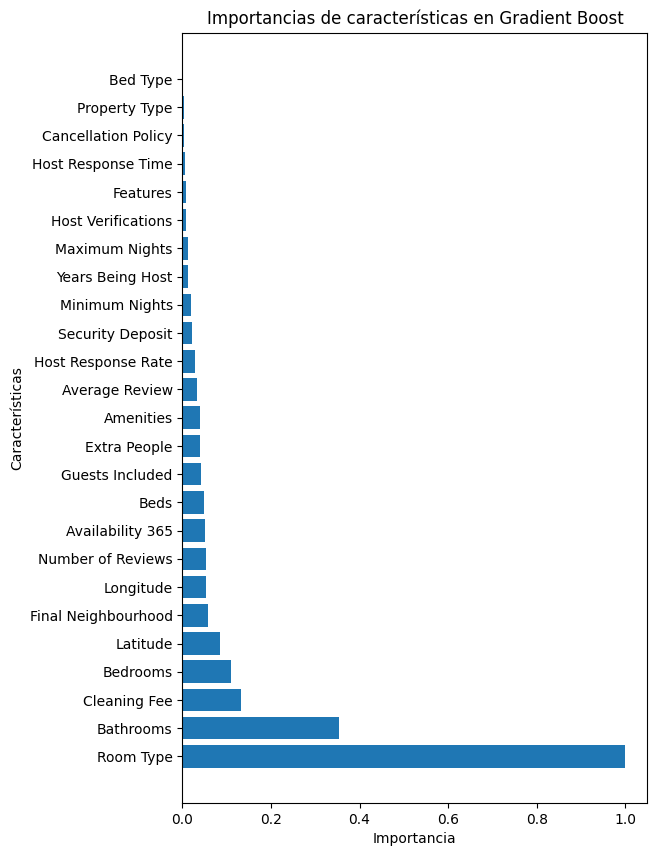

In [136]:
#Ver importancia de variables
features = df_comb.columns.drop(['Price'])
importances = gradient_model.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(6,10))
plt.barh(range(X_train.shape[1]),importances[indices])
plt.yticks(range(X_train.shape[1]),features[indices])
plt.xlabel('Importancia')
plt.ylabel('Características')
plt.title('Importancias de características en Gradient Boost')
plt.show()
plt.show()

La variable que más influye es el Room Type, es decir, si casa entera, habitación privada o habitación compartida,  la segunda variable que más influye es el número de baños que tiene el alojamiento, por eso, podremos decir que los precios influye en función del tipo de alojamiento y número de baños. A segundo plano, está la tarifa de limpieza y detrás de ella el número de habitaciones. La 5ª variable que más influye en el precio es la latitud, y la latitud hace referencia a la ubicación del sitio. Las demás variables que también influyen en el precio son la disponibilidad, el barrio, el número de camas, números de reseñas, la lonfgitud (ubicación junto con la latitud)...

**Cross** **validation** **score**

Vamos a realizar un cross validation score y su media para evaluar el rendimiento del gradient boost y utilizaremos 5 K folds, estimando el modelo en 5 pliegues.

In [137]:
cross_validation_xgb = cross_val_score(gradient_model, X_df, y_df, cv=5) 
print("Scores de validación cruzada XGB:", cross_validation_xgb)
print("Mean Score de validación cruzada XGB:", cross_validation_xgb.mean())

Scores de validación cruzada XGB: [0.74945596 0.75559313 0.72721238 0.76761278 0.74364002]
Mean Score de validación cruzada XGB: 0.7487028542467822


 La media de score es de 0.7487398516950791 es un resultado positivo y muestra que el modelo tiene un buen rendimiento. 

**Diferencia** **de** **precios**

In [138]:
evaluador['Difference'] = evaluador['Price'] - evaluador['PricePredicted']
evaluador.head()

,Price,PricePredicted,Difference
40,28.0,19.064956,8.935044
41,58.0,59.812822,-1.812822
42,70.0,57.313415,12.686585
43,26.0,34.242171,-8.242171
44,70.0,72.988819,-2.988819


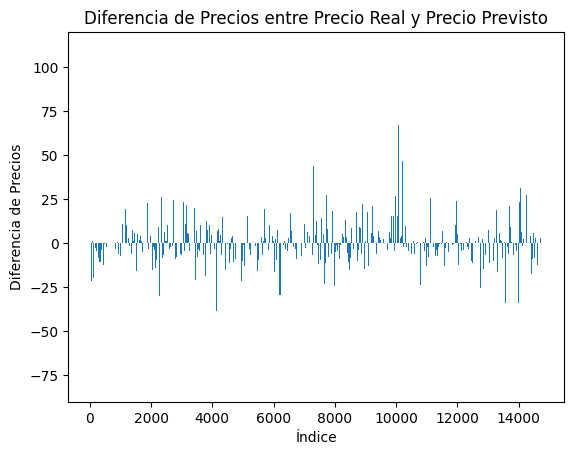

In [139]:
# Crear el gráfico de barras para la diferencia de precios
plt.bar(evaluador.index, evaluador['Difference'])

# Configurar las etiquetas y los títulos del gráfico
plt.xlabel('Índice')
plt.ylabel('Diferencia de Precios')
plt.title('Diferencia de Precios entre Precio Real y Precio Previsto')

# Mostrar el gráfico
plt.show()

En este gráfico se puede ver la diferencia entre el precio real de los alojamientos y el precio previsto. Se puede ver que la suma de estos valores, de los errores de la predicción sumarían 0 o cerca de 0. También, se puede ver que no varía mucho del precio previsto/evaluado al precio real salvo en algunas excepciones que se puede ver que hay más diferencia. Sobre todo, resaltan dos casos en que el precio previsto es mucho menos que el precio real y otro en que la situación es justo al revés.

# **Conclusión:** La técnica óptima para evaluar los precios ha sido Grafient Boost con un score de 0,72 y con un buen indicador de cross validation score, el evaluador de precios tiene un error medio cuadrado de 14 y un porcentaje de error medio de 23,2%. Las variables que más influyen son el tipo de habitación (alojamiento entero, habitación privada y habitación compartida), el número de baños, la tarifa de limpieza, el número de habitaciones... variables que influyen en el precio de un alojamiento de AirBnB.